# **Analyse et Prédiction des Crimes à Chicago**

#Phase 1 : Analyse Exploratoire (EDA)


#Chargement et inspection initiale



In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import seaborn as sns # Import seaborn

# afficher plots inline
%matplotlib inline

In [121]:
df = pd.read_csv('final_data.csv')
print('Fichier chargé avec succès. Shape :', df.shape)

Fichier chargé avec succès. Shape : (15000, 31)


In [122]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location', 'nbr_de_crime', 'criminal_id', 'age', 'sex',
       'antecedents', 'gang', 'dangerosite', 'nationalite'],
      dtype='object')

Afficher les premières lignes
**texte en gras**


In [123]:
print("Aperçu des 5 premières lignes:")
df.head(10)

Aperçu des 5 premières lignes:


Unnamed: 0       ID Case Number                    Date  \
0         879  4786321    HM399414  01/01/2004 12:01:00 AM   
1        2544  4676906    HM278933  03/01/2003 12:00:00 AM   
2        2919  4789749    HM402220  06/20/2004 11:00:00 AM   
3        2927  4789765    HM402058  12/30/2004 08:00:00 PM   
4        3302  4677901    HM275615  05/01/2003 01:00:00 AM   
5        3633  4838048    HM440266  08/01/2004 12:01:00 AM   
6        3756  4791194    HM403711  01/01/2001 11:00:00 AM   
7        4502  4679521    HM216293  03/15/2003 12:00:00 AM   
8        4564  4792195    HM405396  09/16/2004 10:00:00 AM   
9        4904  4680124    HM282389  01/01/2003 12:00:00 AM   

                     Block  IUCR                Primary Type  \
0        082XX S COLES AVE  0840                       THEFT   
1          004XX W 42ND PL  2825               OTHER OFFENSE   
2      025XX N KIMBALL AVE  1752  OFFENSE INVOLVING CHILDREN   
3       045XX W MONTANA ST  0840                       THEFT   
4       111XX S NORMAL AVE  0841                       THEFT   
5      012XX S HARDING AVE  0841                       THEFT   
6  114XX S ST LAWRENCE AVE  0266         CRIM SEXUAL ASSAULT   
7       090XX S RACINE AVE  5007               OTHER OFFENSE   
8       003XX W HUBBARD ST  0890                       THEFT   
9    009XX S SPAULDING AVE  0840                       THEFT   

                      Description     Location Description  Arrest  ...  \
0   FINANCIAL ID THEFT: OVER $300                RESIDENCE   False  ...   
1         HARASSMENT BY TELEPHONE                RESIDENCE   False  ...   
2   AGG CRIM SEX ABUSE FAM MEMBER                RESIDENCE   False  ...   
3   FINANCIAL ID THEFT: OVER $300                    OTHER   False  ...   
4  FINANCIAL ID THEFT:$300 &UNDER                RESIDENCE   False  ...   
5  FINANCIAL ID THEFT:$300 &UNDER                APARTMENT   False  ...   
6                       PREDATORY                RESIDENCE    True  ...   
7         OTHER WEAPONS VIOLATION  RESIDENCE PORCH/HALLWAY   False  ...   
8                   FROM BUILDING                RESIDENCE   False  ...   
9   FINANCIAL ID THEFT: OVER $300                RESIDENCE   False  ...   

   Longitude                       Location  nbr_de_crime  criminal_id  age  \
0        NaN                            NaN           432            1   54   
1 -87.637328  (41.817229156, -87.637328162)           195            2   67   
2        NaN                            NaN           267            3   44   
3        NaN                            NaN           291            4   30   
4 -87.635116  (41.691784636, -87.635115968)           312            5   58   
5        NaN                            NaN           450            6   23   
6 -87.608445   (41.687020002, -87.60844523)           449            7   36   
7 -87.653159  (41.729712374, -87.653158513)           396            8   54   
8        NaN                            NaN            71            9   34   
9 -87.708180  (41.869772159, -87.708180162)            51           10   38   

  sex  antecedents    gang  dangerosite nationalite  
0   M      mineurs  Gang B       faible      Canada  
1   F      mineurs   aucun       faible      Canada  
2   M   cybercrime   aucun       faible    Jamaïque  
3   M      mineurs  Gang B      moyenne       Autre  
4   F      mineurs  Gang C       faible    Jamaïque  
5   M     violents   aucun      moyenne       Autre  
6   M        aucun  Gang A       faible     Mexique  
7   M      mineurs   aucun      moyenne    Jamaïque  
8   F   cybercrime   aucun      moyenne    Colombie  
9   M     violents  Gang B       faible    Jamaïque  

[10 rows x 31 columns]

In [124]:
df.tail()

Unnamed: 0        ID Case Number                    Date  \
14995        1943   4676132    HM277284  04/07/2006 01:15:00 PM   
14996      774729   6123653    HP217150  03/09/2008 09:30:00 PM   
14997      731084   6099358    HP192592  02/24/2008 05:25:00 PM   
14998        1642   4675792    HM275075  04/06/2006 11:10:04 AM   
14999      579113  10513371    HZ254924  05/07/2016 12:30:00 AM   

                     Block  IUCR       Primary Type  \
14995   012XX S PULASKI RD  1310    CRIMINAL DAMAGE   
14996  047XX N KENNETH AVE  1320    CRIMINAL DAMAGE   
14997      033XX W 65TH PL  1460  WEAPONS VIOLATION   
14998  071XX S BENNETT AVE  1330  CRIMINAL TRESPASS   
14999      002XX E 96TH ST  0880              THEFT   

                          Description       Location Description  Arrest  ...  \
14995                     TO PROPERTY  SCHOOL, PRIVATE, BUILDING   False  ...   
14996                      TO VEHICLE                     STREET   False  ...   
14997  POSS FIREARM/AMMO:NO FOID CARD                  RESIDENCE    True  ...   
14998                         TO LAND    RESIDENCE PORCH/HALLWAY    True  ...   
14999                 PURSE-SNATCHING                     STREET   False  ...   

       Longitude                       Location  nbr_de_crime  criminal_id  \
14995 -87.725144  (41.865340717, -87.725144124)           220        14996   
14996        NaN                            NaN           233        14997   
14997        NaN                            NaN            45        14998   
14998 -87.579352  (41.765235064, -87.579351928)           356        14999   
14999 -87.618657  (41.719993911, -87.618657049)           311        15000   

       age sex  antecedents    gang  dangerosite nationalite  
14995   40   M        aucun   aucun       faible     Mexique  
14996   46   M       trafic   aucun       faible    Jamaïque  
14997   52   M        aucun  Gang B      moyenne    Jamaïque  
14998   40   M        aucun   aucun       faible         USA  
14999   31   F       trafic  Gang B       faible    Jamaïque  

[5 rows x 31 columns]

In [125]:

print(f" Dimensions du dataset: {df.shape}")
print(f" Nombre de lignes: {df.shape[0]}")
print(f" Nombre de colonnes: {df.shape[1]}")

 Dimensions du dataset: (15000, 31)
 Nombre de lignes: 15000
 Nombre de colonnes: 31


In [126]:
df.describe()

Unnamed: 0            ID          Beat      District          Ward  \
count   15000.000000  1.500000e+04  15000.000000  15000.000000  14942.000000   
mean   393655.543133  6.546840e+06   1191.121333     11.305400     22.704457   
std    335973.527910  2.675522e+06    685.211011      6.790297     13.434093   
min         0.000000  6.340000e+02    111.000000      1.000000      1.000000   
25%      2494.750000  4.676234e+06    632.000000      6.000000     11.000000   
50%    338158.500000  6.102282e+06   1111.000000     10.000000     23.000000   
75%    789595.500000  7.913513e+06   1712.000000     16.000000     33.000000   
max    827305.000000  1.054978e+07   2535.000000     25.000000     50.000000   

       Community Area  X Coordinate  Y Coordinate          Year     Latitude  \
count    14924.000000  8.702000e+03  8.702000e+03  15000.000000  8702.000000   
mean        37.780890  1.164125e+06  1.884684e+06   2008.171000    41.839180   
std         21.416359  1.586554e+04  3.061808e+04      4.856583     0.084211   
min          1.000000  1.100088e+06  1.815754e+06   2001.000000    41.649235   
25%         23.000000  1.152412e+06  1.859791e+06   2004.000000    41.770888   
50%         32.000000  1.165511e+06  1.888908e+06   2006.000000    41.850921   
75%         58.000000  1.175818e+06  1.907411e+06   2010.000000    41.901681   
max         77.000000  1.204787e+06  1.951249e+06   2016.000000    42.021869   

         Longitude  nbr_de_crime   criminal_id           age  
count  8702.000000  15000.000000  15000.000000  15000.000000  
mean    -87.673274    248.808267   7500.500000     42.489000  
std       0.057728    143.835548   4330.271354     15.520316  
min     -87.907473      1.000000      1.000000     16.000000  
25%     -87.716044    124.000000   3750.750000     29.000000  
50%     -87.667747    247.000000   7500.500000     42.000000  
75%     -87.630441    374.000000  11250.250000     56.000000  
max     -87.525758    500.000000  15000.000000     69.000000

In [127]:
print("Informations sur les colonnes:")
df.info()

Informations sur les colonnes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            15000 non-null  int64  
 1   ID                    15000 non-null  int64  
 2   Case Number           15000 non-null  object 
 3   Date                  15000 non-null  object 
 4   Block                 15000 non-null  object 
 5   IUCR                  15000 non-null  object 
 6   Primary Type          15000 non-null  object 
 7   Description           15000 non-null  object 
 8   Location Description  14977 non-null  object 
 9   Arrest                15000 non-null  bool   
 10  Domestic              15000 non-null  bool   
 11  Beat                  15000 non-null  int64  
 12  District              15000 non-null  float64
 13  Ward                  14942 non-null  float64
 14  Community Area        14924 non-null  f

In [128]:
df = df.drop(columns=['ID', 'Unnamed: 0'], errors='ignore')


**Analyse des Valeurs Manquantes et Types de Données**

=== VALEURS MANQUANTES ===
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description      23
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      58
Community Area            76
FBI Code                   0
X Coordinate            6298
Y Coordinate            6298
Year                       0
Updated On                 0
Latitude                6298
Longitude               6298
Location                6298
nbr_de_crime               0
criminal_id                0
age                        0
sex                        0
antecedents                0
gang                       0
dangerosite                0
nationalite                0
dtype: int64




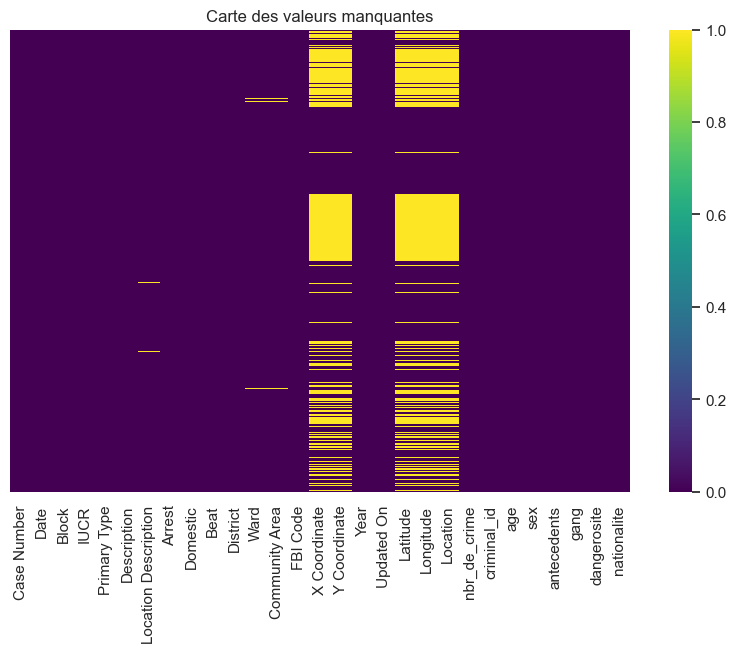

=== POURCENTAGE DE VALEURS MANQUANTES ===
Case Number              0.00
Date                     0.00
Block                    0.00
IUCR                     0.00
Primary Type             0.00
Description              0.00
Location Description     0.15
Arrest                   0.00
Domestic                 0.00
Beat                     0.00
District                 0.00
Ward                     0.39
Community Area           0.51
FBI Code                 0.00
X Coordinate            41.99
Y Coordinate            41.99
Year                     0.00
Updated On               0.00
Latitude                41.99
Longitude               41.99
Location                41.99
nbr_de_crime             0.00
criminal_id              0.00
age                      0.00
sex                      0.00
antecedents              0.00
gang                     0.00
dangerosite              0.00
nationalite              0.00
dtype: float64


In [129]:
print("=== VALEURS MANQUANTES ===")
missing_data = df.isnull().sum()
print(missing_data)
print("\n")

# Visualisation des valeurs manquantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Carte des valeurs manquantes')
plt.show()

# Pourcentage de valeurs manquantes par colonne
print("=== POURCENTAGE DE VALEURS MANQUANTES ===")
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent.round(2))

In [130]:
print("=== DOUBLONS ===")
duplicates_count = df.duplicated().sum()
print(f"Nombre de doublons : {duplicates_count}")

=== DOUBLONS ===
Nombre de doublons : 0


=== ANALYSE DES VARIABLES CATÉGORIELLES ===
Colonnes disponibles : ['Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location', 'nbr_de_crime', 'criminal_id', 'age', 'sex', 'antecedents', 'gang', 'dangerosite', 'nationalite']


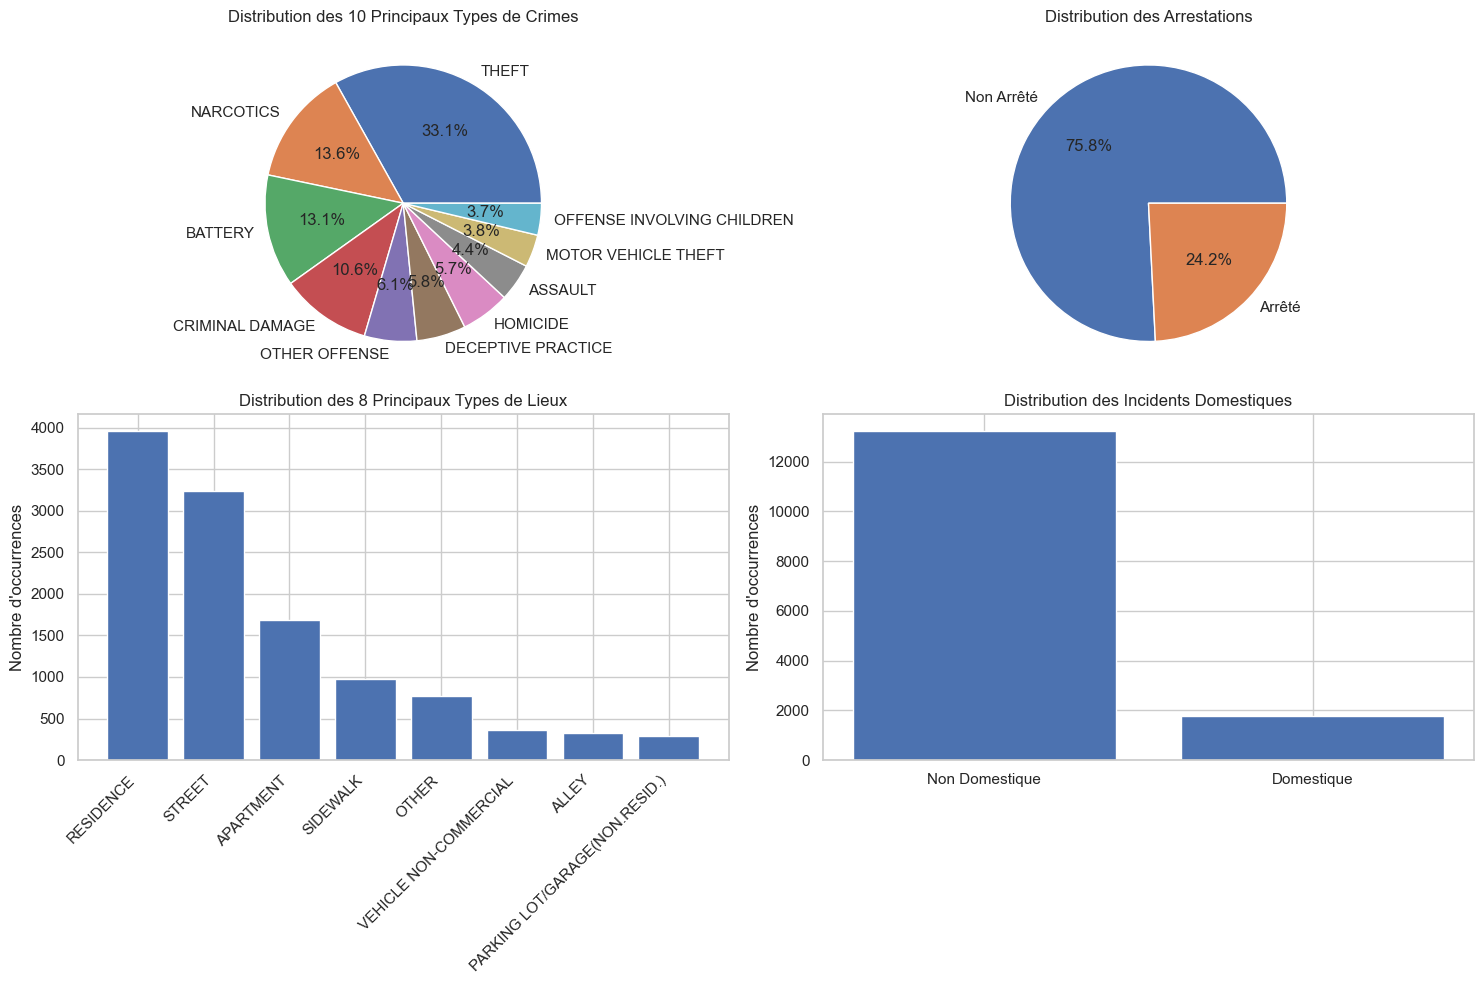


=== INFORMATIONS SUR LE JEU DE DONNÉES ===
Enregistrements totaux : 15000
Plage de dates : 2001 - 2016
Crime le plus fréquent : THEFT
Lieu le plus fréquent : RESIDENCE
Taux d'arrestation : 24.2%
Taux d'incidents domestiques : 11.7%


In [131]:
# === ANALYSE CATÉGORIELLE AMÉLIORÉE ===
print("=== ANALYSE DES VARIABLES CATÉGORIELLES ===")

# Nettoyer les noms de colonnes en supprimant les espaces superflus
df.columns = df.columns.str.strip()

# Vérifier les colonnes disponibles pour confirmer les noms corrects
print("Colonnes disponibles :", df.columns.tolist())

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution des types de crime principaux (colonne 'Primary Type')
crime_types = df['Primary Type'].value_counts().head(10)  # Top 10 des crimes
axes[0,0].pie(crime_types.values, labels=crime_types.index, autopct='%1.1f%%')
axes[0,0].set_title('Distribution des 10 Principaux Types de Crimes')

# Statut d'arrestation (colonne 'Arrest' - booléenne)
arrest_status = df['Arrest'].value_counts()
axes[0,1].pie(arrest_status.values, labels=['Non Arrêté', 'Arrêté'], autopct='%1.1f%%')
axes[0,1].set_title('Distribution des Arrestations')

# Distribution des types de lieux (colonne 'Location Description')
location_types = df['Location Description'].value_counts().head(8)  # Top 8 des lieux
axes[1,0].bar(location_types.index, location_types.values)
axes[1,0].set_title('Distribution des 8 Principaux Types de Lieux')
axes[1,0].set_ylabel('Nombre d\'occurrences')
plt.setp(axes[1,0].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Incidents domestiques (colonne 'Domestic' - booléenne)
domestic_dist = df['Domestic'].value_counts()
axes[1,1].bar(['Non Domestique', 'Domestique'], domestic_dist.values)
axes[1,1].set_title('Distribution des Incidents Domestiques')
axes[1,1].set_ylabel('Nombre d\'occurrences')

plt.tight_layout()
plt.show()

# Informations supplémentaires
print(f"\n=== INFORMATIONS SUR LE JEU DE DONNÉES ===")
print(f"Enregistrements totaux : {len(df)}")
print(f"Plage de dates : {df['Year'].min()} - {df['Year'].max()}")
print(f"Crime le plus fréquent : {df['Primary Type'].mode().iloc[0]}")
print(f"Lieu le plus fréquent : {df['Location Description'].mode().iloc[0]}")
print(f"Taux d'arrestation : {(df['Arrest'].sum() / len(df) * 100):.1f}%")
print(f"Taux d'incidents domestiques : {(df['Domestic'].sum() / len(df) * 100):.1f}%")

### Interprétation

Sur 10 000 cas (2001-2016), **24 % des interventions ont abouti à une arrestation**. **12 % concernent des violences domestiques**, et certains codes de crimes/lieux restent peu lisibles. Il est recommandé de **décoder les variables** et d’**approfondir l’analyse des violences domestiques**.

 Grâce à cette analyse catégorielle, on a compris la structure générale du dataset et les tendances majeures :
les crimes les plus fréquents, les lieux les plus concernés, les taux d’arrestation et les incidents domestiques.
Cette étape est essentielle pour connaître les patterns avant de construire un modèle de Machine Learning


=== CRIME ANALYSIS BY CATEGORIES ===
Colonnes disponibles dans le dataset:
['Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location', 'nbr_de_crime', 'criminal_id', 'age', 'sex', 'antecedents', 'gang', 'dangerosite', 'nationalite']

Colonnes après nettoyage:
['Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location', 'nbr_de_crime', 'criminal_id', 'age', 'sex', 'antecedents', 'gang', 'dangerosite', 'nationalite']
Utilisation de la colonne de date: Date


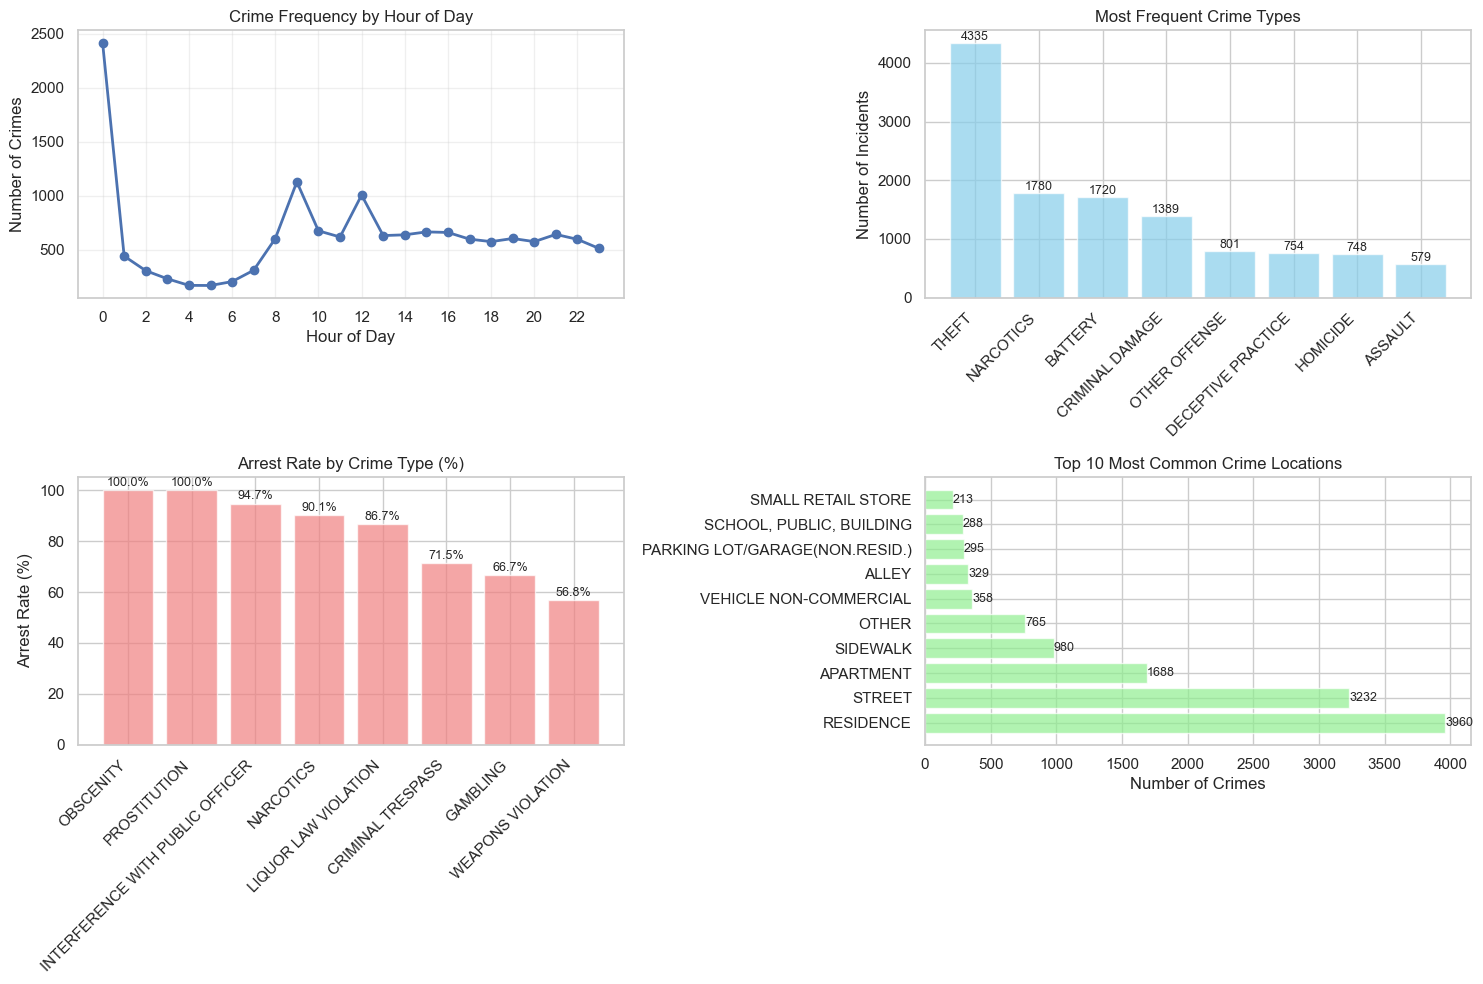


=== STATISTIQUES SUPPLÉMENTAIRES ===
Total des crimes analysés: 15000
Nombre de types de crime différents: 26
Crime le plus fréquent: THEFT
Lieu le plus fréquent: RESIDENCE
Taux d'arrestation: 24.2%
Incidents domestiques: 11.7%


In [132]:
# === CRIME ANALYSIS BY CATEGORIES ===
print("=== CRIME ANALYSIS BY CATEGORIES ===")

# Vérifier les noms exacts des colonnes
print("Colonnes disponibles dans le dataset:")
print(df.columns.tolist())

# Nettoyer les noms des colonnes (supprimer les espaces avant/après)
df.columns = df.columns.str.strip()
print("\nColonnes après nettoyage:")
print(df.columns.tolist())

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Crime frequency by time of day - CORRIGÉ
# Utiliser la colonne 'Date' qui existe dans votre dataset
if 'Date' in df.columns:
    print(f"Utilisation de la colonne de date: Date")
    df_clean = df.copy()
    df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
    df_clean['HOUR'] = df_clean['Date'].dt.hour
    hourly_crimes = df_clean['HOUR'].dropna().value_counts().sort_index()
    axes[0,0].plot(hourly_crimes.index, hourly_crimes.values, marker='o', linewidth=2, markersize=6)
    axes[0,0].set_title('Crime Frequency by Hour of Day')
    axes[0,0].set_xlabel('Hour of Day')
    axes[0,0].set_ylabel('Number of Crimes')
    axes[0,0].set_xticks(range(0, 24, 2))
    axes[0,0].grid(True, alpha=0.3)
else:
    axes[0,0].text(0.5, 0.5, 'Colonne Date non trouvée',
                   ha='center', va='center', transform=axes[0,0].transAxes)
    axes[0,0].set_title('Crime Frequency by Hour of Day')

# 2. Most Frequent Crime Types - CORRIGÉ (utiliser 'Primary Type')
if 'Primary Type' in df.columns:
    crime_types = df['Primary Type'].value_counts().head(8)
    bars = axes[0,1].bar(range(len(crime_types)), crime_types.values, color='skyblue', alpha=0.7)
    axes[0,1].set_title('Most Frequent Crime Types')
    axes[0,1].set_ylabel('Number of Incidents')
    axes[0,1].set_xticks(range(len(crime_types)))
    axes[0,1].set_xticklabels(crime_types.index, rotation=45, ha='right')

    # Ajouter les valeurs sur les barres
    for bar, value in zip(bars, crime_types.values):
        axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                      f'{value}', ha='center', va='bottom', fontsize=9)
else:
    axes[0,1].text(0.5, 0.5, 'Primary Type non trouvé',
                   ha='center', va='center', transform=axes[0,1].transAxes)
    axes[0,1].set_title('Most Frequent Crime Types')

# 3. Arrest rate by crime type - CORRIGÉ
if 'Arrest' in df.columns and 'Primary Type' in df.columns:
    # Convertir Arrest en booléen si nécessaire
    df['Arrest_bool'] = df['Arrest'].astype(bool)

    arrest_rates = df[df['Arrest_bool'] == True].groupby('Primary Type').size()
    total_crimes = df.groupby('Primary Type').size()
    arrest_percentage = (arrest_rates / total_crimes * 100).fillna(0)

    # Prendre les 8 types de crime avec le plus d'arrestations
    top_arrest_crimes = arrest_percentage.nlargest(8)

    bars = axes[1,0].bar(range(len(top_arrest_crimes)), top_arrest_crimes.values,
                        color='lightcoral', alpha=0.7)
    axes[1,0].set_title('Arrest Rate by Crime Type (%)')
    axes[1,0].set_ylabel('Arrest Rate (%)')
    axes[1,0].set_xticks(range(len(top_arrest_crimes)))
    axes[1,0].set_xticklabels(top_arrest_crimes.index, rotation=45, ha='right')

    # Ajouter les pourcentages sur les barres
    for bar, value in zip(bars, top_arrest_crimes.values):
        axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                      f'{value:.1f}%', ha='center', va='bottom', fontsize=9)
else:
    axes[1,0].text(0.5, 0.5, 'Arrest ou Primary Type manquant',
                   ha='center', va='center', transform=axes[1,0].transAxes)
    axes[1,0].set_title('Arrest Rate by Crime Type (%)')

# 4. Top 10 locations for crimes - CORRIGÉ (utiliser 'Location Description')
if 'Location Description' in df.columns:
    top_locations = df['Location Description'].value_counts().head(10)
    bars = axes[1,1].barh(range(len(top_locations)), top_locations.values,
                         color='lightgreen', alpha=0.7)
    axes[1,1].set_yticks(range(len(top_locations)))
    axes[1,1].set_yticklabels(top_locations.index)
    axes[1,1].set_title('Top 10 Most Common Crime Locations')
    axes[1,1].set_xlabel('Number of Crimes')

    # Ajouter les valeurs à droite des barres
    for i, (bar, value) in enumerate(zip(bars, top_locations.values)):
        axes[1,1].text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                      f'{value}', ha='left', va='center', fontsize=9)
else:
    axes[1,1].text(0.5, 0.5, 'Location Description non trouvé',
                   ha='center', va='center', transform=axes[1,1].transAxes)
    axes[1,1].set_title('Top 10 Most Common Crime Locations')

plt.tight_layout()
plt.show()

# Statistiques supplémentaires
print(f"\n=== STATISTIQUES SUPPLÉMENTAIRES ===")
print(f"Total des crimes analysés: {len(df)}")
if 'Primary Type' in df.columns:
    print(f"Nombre de types de crime différents: {df['Primary Type'].nunique()}")
    print(f"Crime le plus fréquent: {df['Primary Type'].mode().iloc[0]}")
if 'Location Description' in df.columns:
    print(f"Lieu le plus fréquent: {df['Location Description'].mode().iloc[0]}")
if 'Arrest' in df.columns:
    arrest_count = df['Arrest'].sum() if df['Arrest'].dtype == 'bool' else (df['Arrest'] == 'True').sum()
    print(f"Taux d'arrestation: {(arrest_count/len(df)*100):.1f}%")
if 'Domestic' in df.columns:
    domestic_count = df['Domestic'].sum() if df['Domestic'].dtype == 'bool' else (df['Domestic'] == 'True').sum()
    print(f"Incidents domestiques: {(domestic_count/len(df)*100):.1f}%")

### Interprétation

 Plus de crimes le soir  
 Vols et agressions les plus fréquents  
 24 % d'arrestations  
 Rues et résidences principales zones à risque

Cette analyse nous permet de comprendre la structure du dataset et d’identifier les patterns importants : les heures critiques, les crimes dominants, les lieux les plus exposés et l’efficacité policière.
Toutes ces informations sont essentielles avant de passer au modèle de Machine Learning


#  Prétraitement des données

# Nettoyage des Données

## Valeurs manquantes et doublons

On calcule le nombre et le pourcentage de valeurs manquantes par colonne, et on détecte les doublons.

***1- Detection des doublons***

In [133]:
print("Nombre de doublons:", df.duplicated().sum())


Nombre de doublons: 0


In [134]:
df.drop_duplicates(inplace=True)
print("Nombre de doublons:", df.duplicated().sum())

Nombre de doublons: 0


In [135]:
# Imputation
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

print("Valeurs manquantes imputées")

Valeurs manquantes imputées


Colonnes numériques : Remplissage par la médiane.

Colonnes catégorielles : Remplissage par le mode (valeur la plus fréquente).

**Encodage simple des variables catégorielles**

In [136]:
#  Recalcule des listes (si nouvelles colonnes créées)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

#  Label encoding (simple)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for c in cat_cols:
    try:
        df[c] = le.fit_transform(df[c].astype(str))
    except Exception as e:
        print('Erreur encodage', c, e)

print('Encodage terminé. Nombre de features:', df.shape[1])


Encodage terminé. Nombre de features: 30


Transformation des variables catégorielles en valeurs numériques pour les algorithmes

# Normalisation / Standardisation

In [137]:
#  Vérifier si scaling nécessaire
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
stds = df[num_cols].std()
ranges = df[num_cols].max() - df[num_cols].min()
need_scaling = (stds.max()/ (stds.min() if stds.min()!=0 else 1) > 5) or (ranges.max()/ (ranges.min() if ranges.min()!=0 else 1) > 5)
print('Need scaling?', need_scaling)


#  Appliquer StandardScaler (recommandé pour PCA/KMeans/DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_cols])


# version normalisée [0,1]
norm_scaler = MinMaxScaler()
X_norm = norm_scaler.fit_transform(df[num_cols])


# Remplacer colonnes numériques par version scaled dans un DataFrame de travail
df_scaled = df.copy()
df_scaled[num_cols] = X_scaled
print('Scaling appliqué. df_scaled shape:', df_scaled.shape)

print("✅ Prétraitement terminé !")
display(df.head())

Need scaling? True
Scaling appliqué. df_scaled shape: (15000, 30)
✅ Prétraitement terminé !


Case Number  Date  Block  IUCR  Primary Type  Description  \
0         2804    53   6360    56            24           79   
1         2740  1305    547   181            18           96   
2         2812  5717   2599   140            17            1   
3         2811  6810   4139    56            24           79   
4         1691  3854   6909    57            24           80   

   Location Description  Arrest  Domestic  Beat  ...  Location  nbr_de_crime  \
0                    85       0         0   424  ...      5174           432   
1                    85       0         1   935  ...      2434           195   
2                    85       0         0  1413  ...      5174           267   
3                    74       0         0  2521  ...      5174           291   
4                    85       0         0  2233  ...       174           312   

   criminal_id  age  sex  antecedents  gang  dangerosite  nationalite  \
0            1   54    1            2     1            0            1   
1            2   67    0            2     3            0            1   
2            3   44    1            1     3            0            3   
3            4   30    1            2     1            1            0   
4            5   58    0            2     2            0            3   

   Arrest_bool  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 30 columns]

#interpretation
Grâce à ce prétraitement, toutes les variables numériques sont maintenant sur une échelle comparable.
Cela évite que certaines variables dominent les modèles ML simplement à cause de leur grandeur.
C’est une étape essentielle avant d’appliquer PCA, clustering ou toute autre analyse basée sur la distance

#EDA visuel

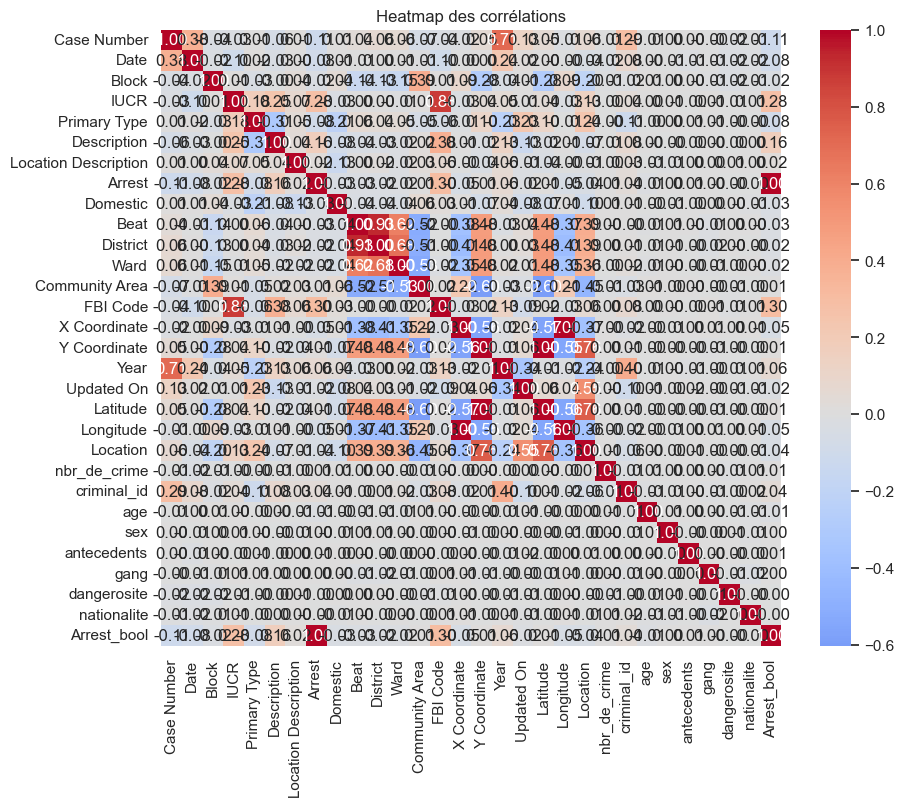

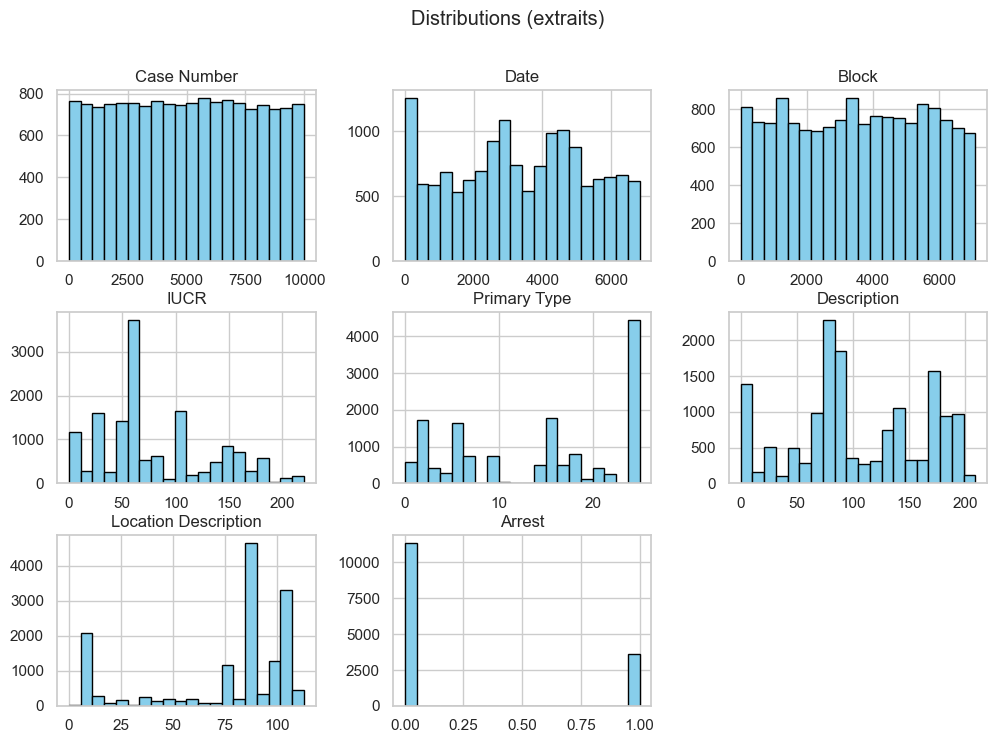

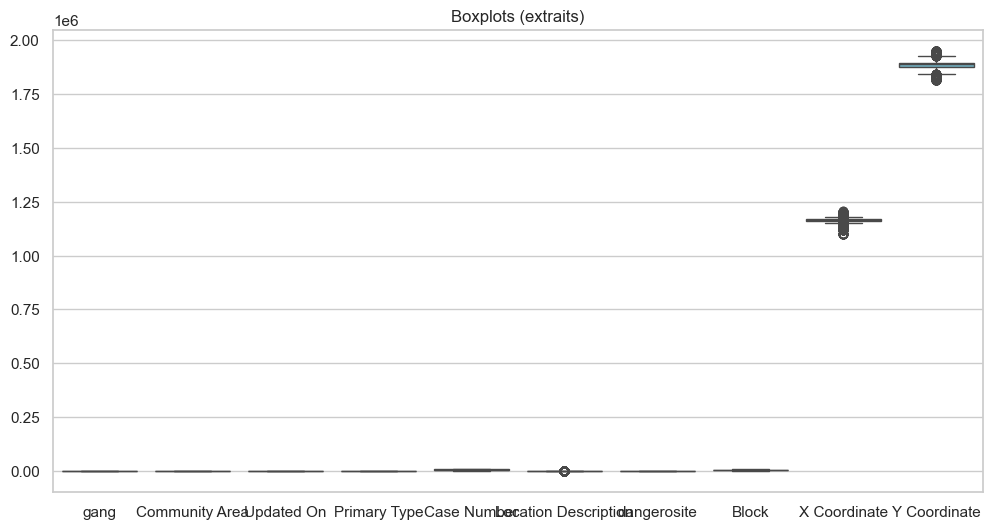

In [138]:
# Corrélation (heatmap)
plt.figure(figsize=(10,8))
sns.heatmap(df_scaled[num_cols].corr(), cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title('Heatmap des corrélations')
plt.show()

# Histogrammes (quelques colonnes choisies)
cols_to_plot = num_cols[:8]
df[cols_to_plot].hist(bins=20, figsize=(12,8), color='skyblue', edgecolor='black')
plt.suptitle('Distributions (extraits)')
plt.show()

# Boxplots pour détecter les outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols].sample(n=min(10, len(num_cols)), axis=1))
plt.title('Boxplots (extraits)')
plt.show()

➤ Les distributions montrent les tendances globales des variables.\
➤ Les boxplots permettent d’observer des valeurs extrêmes (outliers).\
➤ La heatmap met en évidence les corrélations entre variables numériques.
Visualisation des corrélations : Matrice montrant les relations linéaires entre variables numériques.

Paramètres :

cmap='coolwarm' : Code couleur bleu(negative)-rouge(positive)

annot=True : Affiche les valeurs numériques

fmt=".2f" : Format à 2 décimales

Utilité : Identifier les variables fortement corrélées pour la sélection de features.

In [139]:
print("Variance des variables numériques :")
print(df[num_cols].var().sort_values(ascending=False))

Variance des variables numériques :
Y Coordinate            5.481766e+08
X Coordinate            1.464891e+08
criminal_id             1.875125e+07
Case Number             8.253331e+06
Block                   4.181183e+06
Date                    3.814984e+06
Location                2.877101e+06
Beat                    4.695141e+05
nbr_de_crime            2.068866e+04
Description             3.338733e+03
Updated On              3.169824e+03
IUCR                    2.733408e+03
Location Description    1.066981e+03
Community Area          4.565049e+02
age                     2.408802e+02
Ward                    1.797773e+02
Primary Type            7.408930e+01
FBI Code                4.852143e+01
District                4.610814e+01
Year                    2.358640e+01
nationalite             2.962786e+00
antecedents             1.977621e+00
gang                    1.310354e+00
dangerosite             5.340939e-01
sex                     2.087778e-01
Arrest                  1.834826e-01
Ar

**Matrice de correlation**

=== ANALYSE DES CORRÉLATIONS ===
Types de données dans le dataset:
Case Number               int64
Date                      int64
Block                     int64
IUCR                      int64
Primary Type              int64
Description               int64
Location Description      int64
Arrest                    int64
Domestic                  int64
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                  int64
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On                int64
Latitude                float64
Longitude               float64
Location                  int64
nbr_de_crime              int64
criminal_id               int64
age                       int64
sex                       int64
antecedents               int64
gang                      int64
dangerosite               int64
nationalite               int64
Arres

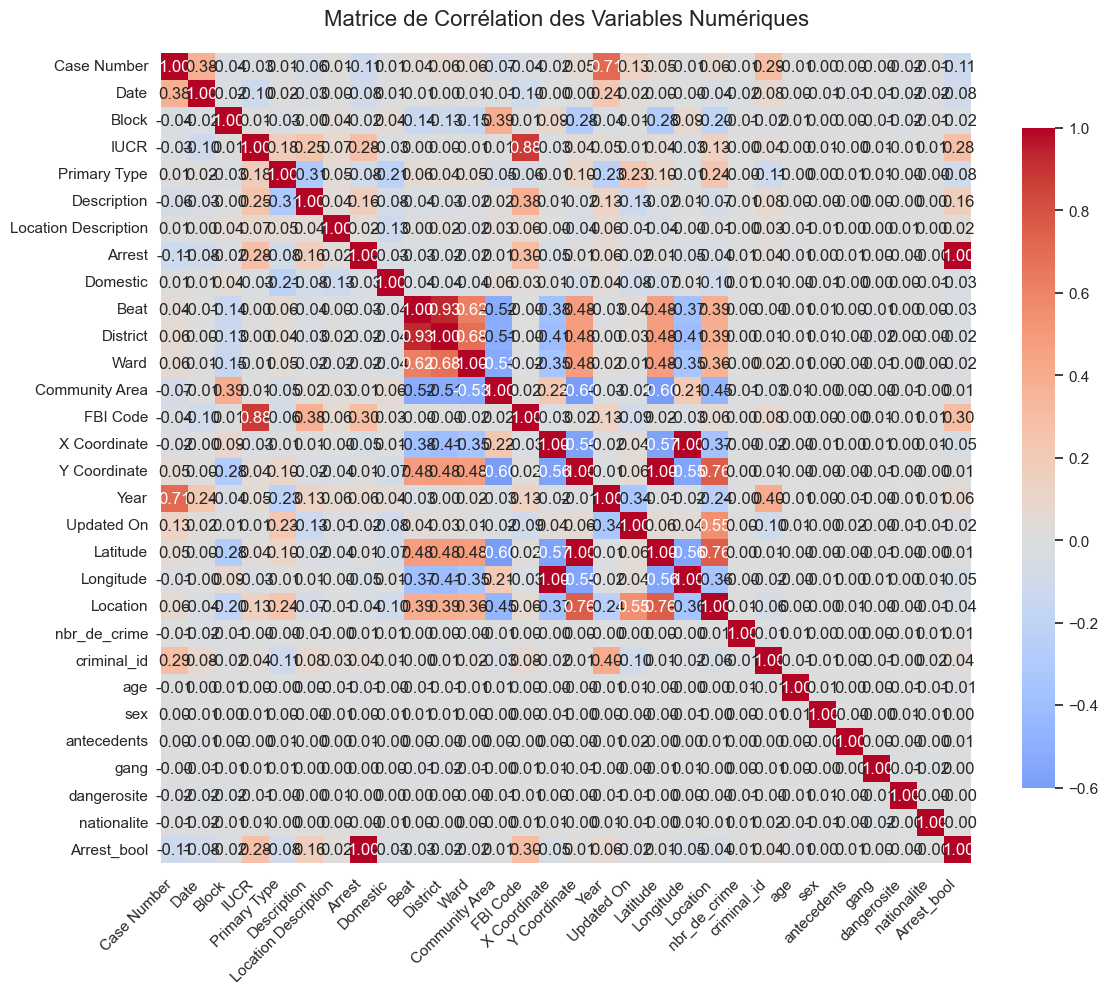


Paires fortement corrélées (> 0.8) :
  District - Beat: 0.934
  FBI Code - IUCR: 0.876
  Latitude - Y Coordinate: 1.000
  Longitude - X Coordinate: 1.000

Colonnes supprimées (corrélation > 0.8) : ['District', 'FBI Code', 'Latitude', 'Longitude', 'Arrest_bool']
Shape avant suppression : (15000, 30)
Shape après suppression : (15000, 25)


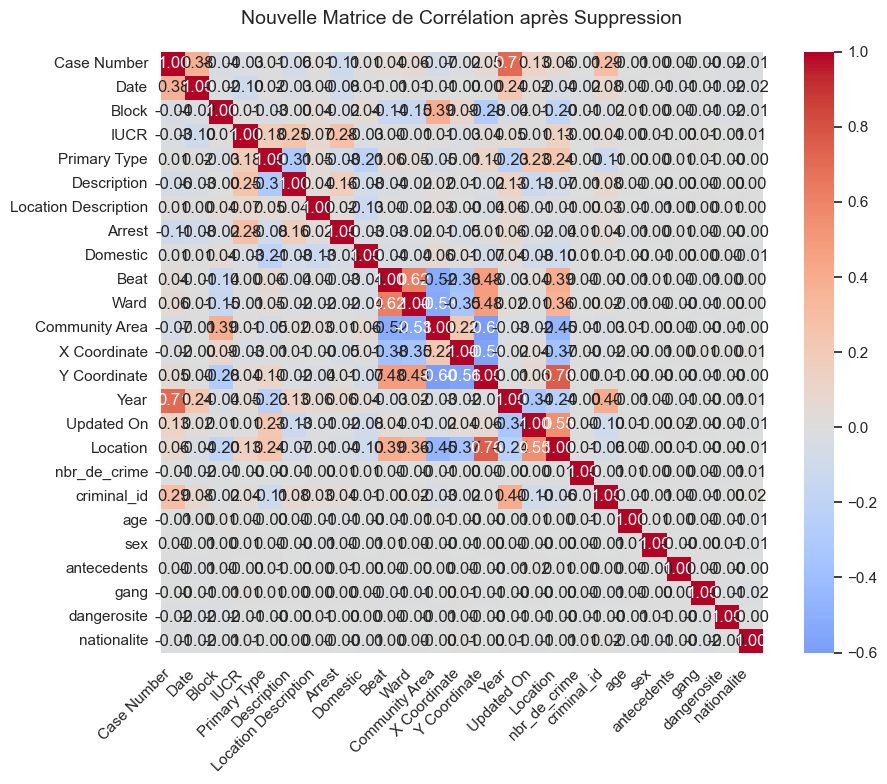


=== ANALYSE DES VARIABLES CATÉGORIELLES ===
Colonnes catégorielles : []

Distribution des types de crime (Top 10) :
Primary Type
24    4335
15    1780
2     1720
5     1389
18     801
7      754
9      748
1      579
14     497
17     487
Name: count, dtype: int64

Distribution des lieux (Top 10) :
Location Description
85     3983
102    3232
9      1688
98      980
74      765
110     358
7       329
79      295
96      288
99      213
Name: count, dtype: int64

=== TAUX D'ARRESTATION PAR TYPE DE CRIME ===
  19: 100.0%
  16: 100.0%
  10: 94.7%
  15: 90.1%
  13: 86.7%
  6: 71.5%
  8: 66.7%
  25: 56.8%
  9: 50.0%
  0: 50.0%


In [140]:
# Tout d'abord, identifions quelles colonnes sont numériques et peuvent être utilisées pour la corrélation
print("=== ANALYSE DES CORRÉLATIONS ===")

# Vérifier les types de données
print("Types de données dans le dataset:")
print(df.dtypes)

# Identifier les colonnes numériques pour l'analyse de corrélation
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nColonnes numériques disponibles: {numeric_columns}")

if len(numeric_columns) > 1:
    # Calculer la matrice de corrélation uniquement pour les colonnes numériques
    correlation_matrix = df[numeric_columns].corr()

    # Créer une heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix,
                cmap='coolwarm',
                center=0,
                annot=True,
                fmt=".2f",
                square=True,
                cbar_kws={"shrink": .8})
    plt.title('Matrice de Corrélation des Variables Numériques', fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Trouver les paires fortement corrélées (> 0.8, excluant la diagonale)
    high_corr_mask = (correlation_matrix.abs() > 0.8) & (correlation_matrix != 1.0)
    high_corr_pairs = []

    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if high_corr_mask.iloc[i, j]:
                col1 = correlation_matrix.columns[i]
                col2 = correlation_matrix.columns[j]
                corr_value = correlation_matrix.iloc[i, j]
                high_corr_pairs.append((col1, col2, corr_value))

    print("\nPaires fortement corrélées (> 0.8) :")
    if high_corr_pairs:
        for pair in high_corr_pairs:
            print(f"  {pair[0]} - {pair[1]}: {pair[2]:.3f}")
    else:
        print("  Aucune paire fortement corrélée trouvée")

    # Supprimer les variables fortement corrélées
    def remove_highly_correlated_features(df, threshold=0.8):
        corr_matrix = df.corr().abs()
        upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
        return df.drop(columns=to_drop), to_drop

    df_reduced, dropped_cols = remove_highly_correlated_features(df[numeric_columns], threshold=0.8)

    print(f"\nColonnes supprimées (corrélation > 0.8) : {dropped_cols}")
    print(f"Shape avant suppression : {df[numeric_columns].shape}")
    print(f"Shape après suppression : {df_reduced.shape}")

    # Afficher la matrice de corrélation réduite
    if len(df_reduced.columns) > 1:
        plt.figure(figsize=(10, 8))
        sns.heatmap(df_reduced.corr(),
                    cmap='coolwarm',
                    center=0,
                    annot=True,
                    fmt=".2f",
                    square=True)
        plt.title('Nouvelle Matrice de Corrélation après Suppression', fontsize=14, pad=20)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

else:
    print("Pas assez de colonnes numériques pour l'analyse de corrélation")

# Analyse supplémentaire : vérifier les corrélations potentielles pour les variables catégorielles
print("\n=== ANALYSE DES VARIABLES CATÉGORIELLES ===")
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns.tolist()
print(f"Colonnes catégorielles : {categorical_columns}")

# Afficher les distributions pour certaines variables catégorielles clés
if 'Primary Type' in df.columns:
    print(f"\nDistribution des types de crime (Top 10) :")
    print(df['Primary Type'].value_counts().head(10))

if 'Location Description' in df.columns:
    print(f"\nDistribution des lieux (Top 10) :")
    print(df['Location Description'].value_counts().head(10))

# Analyser le taux d'arrestation par type de crime
if 'Arrest' in df.columns and 'Primary Type' in df.columns:
    print(f"\n=== TAUX D'ARRESTATION PAR TYPE DE CRIME ===")
    arrest_rates = df.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False).head(10)
    for crime_type, rate in arrest_rates.items():
        print(f"  {crime_type}: {rate:.1%}")


# Réduction de dimension (PCA)

In [141]:
print("Variance des variables numériques :")
print(df[num_cols].var().sort_values(ascending=False))

Variance des variables numériques :
Y Coordinate            5.481766e+08
X Coordinate            1.464891e+08
criminal_id             1.875125e+07
Case Number             8.253331e+06
Block                   4.181183e+06
Date                    3.814984e+06
Location                2.877101e+06
Beat                    4.695141e+05
nbr_de_crime            2.068866e+04
Description             3.338733e+03
Updated On              3.169824e+03
IUCR                    2.733408e+03
Location Description    1.066981e+03
Community Area          4.565049e+02
age                     2.408802e+02
Ward                    1.797773e+02
Primary Type            7.408930e+01
FBI Code                4.852143e+01
District                4.610814e+01
Year                    2.358640e+01
nationalite             2.962786e+00
antecedents             1.977621e+00
gang                    1.310354e+00
dangerosite             5.340939e-01
sex                     2.087778e-01
Arrest                  1.834826e-01
Ar

In [142]:
# Supprimer les variables avec variance quasi-nulle
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)  # ajuster le seuil
X_filtered = selector.fit_transform(df[num_cols])

=== SÉLECTION DES MEILLEURES FEATURES POUR LA PCA ===
Colonnes numériques disponibles : ['Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location', 'nbr_de_crime', 'criminal_id', 'age', 'sex', 'antecedents', 'gang', 'dangerosite', 'nationalite', 'Arrest_bool']

Variances des features :
Y Coordinate            5.481766e+08
X Coordinate            1.464891e+08
criminal_id             1.875125e+07
Case Number             8.253331e+06
Block                   4.181183e+06
Date                    3.814984e+06
Location                2.877101e+06
Beat                    4.695141e+05
nbr_de_crime            2.068866e+04
Description             3.338733e+03
Updated On              3.169824e+03
IUCR                    2.733408e+03
Location Description    1.066981e+03
Community Area          4

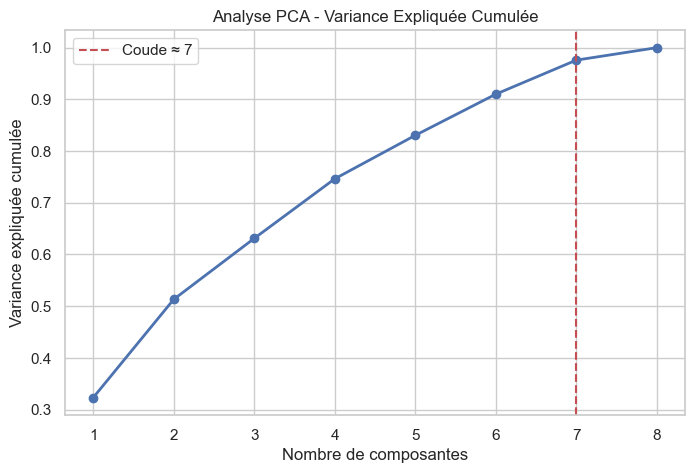

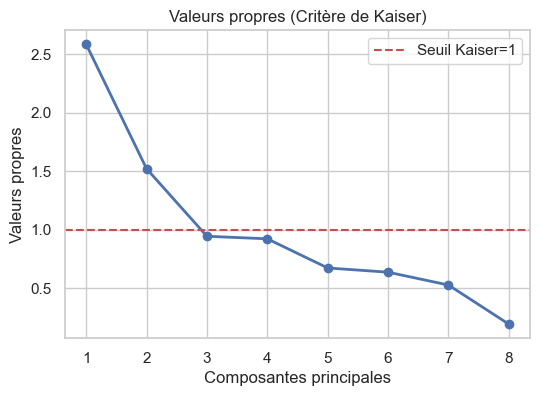

Composantes selon Kaiser (valeur propre > 1) : 2
Variance expliquée cumulée : 51.3%


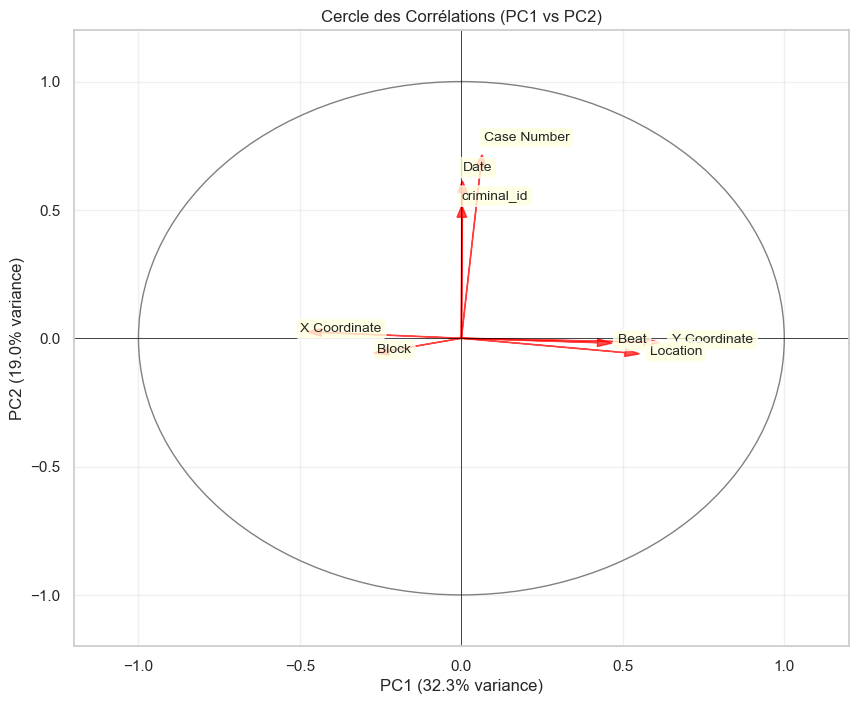

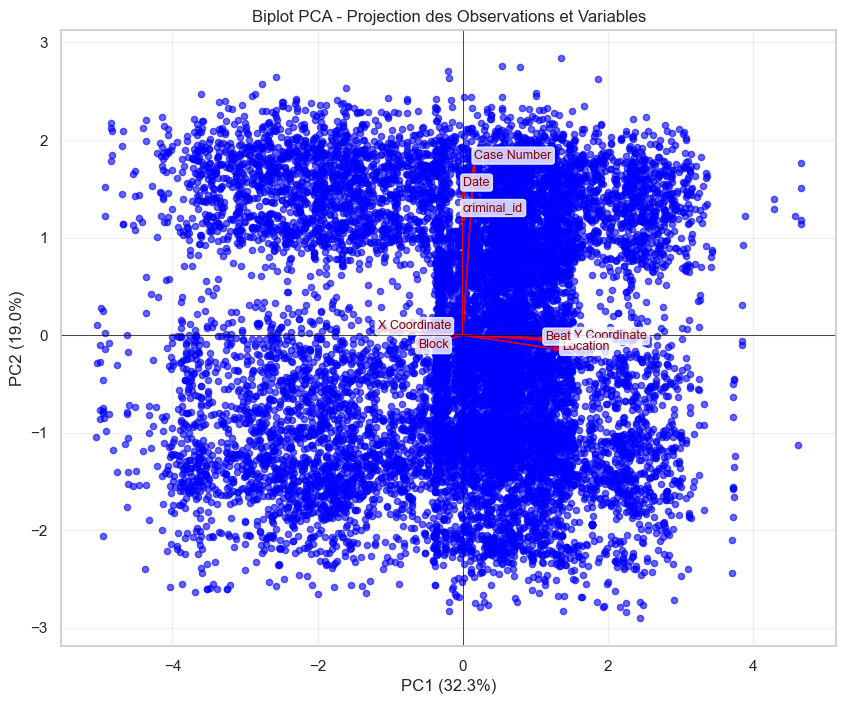


=== RÉSUMÉ PCA ===
Nombre de features utilisées : 8
Composantes optimales (Kaiser) : 2
Variance totale expliquée PC1+PC2 : 51.3%

Variables importantes pour PC1 :
Y Coordinate    0.567195
Location        0.506980
X Coordinate    0.433619
dtype: float64

Variables importantes pour PC2 :
Case Number    0.670040
Date           0.567693
criminal_id    0.471334
dtype: float64


In [143]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Tout d'abord, identifions et préparons les meilleures colonnes numériques
print("=== SÉLECTION DES MEILLEURES FEATURES POUR LA PCA ===")

# Récupérer les colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Colonnes numériques disponibles : {numeric_cols}")

if len(numeric_cols) > 1:
    # Supprimer les colonnes avec trop de valeurs manquantes ou variance nulle
    X = df[numeric_cols].dropna()

    # Calculer la variance et sélectionner les meilleures features
    variances = X.var().sort_values(ascending=False)
    print(f"\nVariances des features :")
    print(variances)

    # Sélectionner les meilleures features (éviter les colonnes fortement corrélées)
    selected_features = []
    correlation_matrix = X.corr().abs()

    for feature in variances.index:
        if len(selected_features) == 0:
            selected_features.append(feature)
        else:
            # Vérifier si la feature est fortement corrélée avec celles déjà sélectionnées
            max_corr = max([correlation_matrix.loc[feature, existing] for existing in selected_features])
            if max_corr < 0.8:  # Ajouter seulement si non fortement corrélée
                selected_features.append(feature)
        if len(selected_features) >= 8:  # Limiter à 8 meilleures features
            break

    print(f"\nMeilleures features sélectionnées : {selected_features}")

    # Préparer les données avec les features sélectionnées
    X_selected = X[selected_features]
    X_scaled = StandardScaler().fit_transform(X_selected)
    num_cols = selected_features

    print(f"Shape final du dataset : {X_scaled.shape}")

    #  PCA complète pour diagnostic
    pca_full = PCA(n_components=min(10, X_scaled.shape[1]))
    pca_full.fit(X_scaled)
    var_cumsum = np.cumsum(pca_full.explained_variance_ratio_)

    plt.figure(figsize=(8,5))
    plt.plot(range(1, len(var_cumsum)+1), var_cumsum, marker='o', linewidth=2)
    plt.xlabel('Nombre de composantes')
    plt.ylabel('Variance expliquée cumulée')
    plt.title('Analyse PCA - Variance Expliquée Cumulée')
    plt.grid(True)

    # Détection automatique du coude simple (seuil)
    diff = np.diff(var_cumsum)
    if len(diff) > 0:
        elbow = np.argmax(diff < 0.05) + 1  # Seuil pratique pour le coude
        plt.axvline(elbow, color='r', linestyle='--', label=f'Coude ≈ {elbow}')
        plt.legend()
    plt.show()

    #  Critère de Kaiser
    eig = pca_full.explained_variance_
    plt.figure(figsize=(6,4))
    plt.plot(range(1, len(eig)+1), eig, marker='o', linewidth=2)
    plt.axhline(1.0, color='r', linestyle='--', label='Seuil Kaiser=1')
    plt.title("Valeurs propres (Critère de Kaiser)")
    plt.xlabel('Composantes principales')
    plt.ylabel('Valeurs propres')
    plt.legend()
    plt.grid(True)
    plt.show()

    kaiser_components = (eig > 1).sum()
    print(f'Composantes selon Kaiser (valeur propre > 1) : {kaiser_components}')
    print(f'Variance expliquée cumulée : {var_cumsum[kaiser_components-1]:.1%}')

    # Cercle des corrélations (PC1 vs PC2)
    pca2 = PCA(n_components=2)
    pcs = pca2.fit_transform(X_scaled)
    components = pca2.components_

    plt.figure(figsize=(10,8))
    plt.title('Cercle des Corrélations (PC1 vs PC2)')

    # Cercle unité
    circle = plt.Circle((0,0), 1, color='gray', fill=False, linewidth=1)
    plt.gca().add_artist(circle)

    for i, (x, y) in enumerate(zip(components[0, :], components[1, :])):
        plt.arrow(0, 0, x, y, head_width=0.03, color='red', alpha=0.7)
        plt.text(x * 1.15, y * 1.15, num_cols[i], fontsize=10,
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.8))

    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    plt.xlabel(f'PC1 ({pca2.explained_variance_ratio_[0]*100:.1f}% variance)')
    plt.ylabel(f'PC2 ({pca2.explained_variance_ratio_[1]*100:.1f}% variance)')
    plt.grid(True, alpha=0.3)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.show()

    #  Biplot : points projetés + flèches des variables
    plt.figure(figsize=(10,8))

    # Points des observations
    plt.scatter(pcs[:, 0], pcs[:, 1], s=20, alpha=0.6, c='blue')

    # Vecteurs des variables
    scale_factor = 2.5
    for i, (x, y) in enumerate(zip(components[0, :], components[1, :])):
        plt.arrow(0, 0, x * scale_factor, y * scale_factor,
                  head_width=0.05, color='red', alpha=0.8)
        plt.text(x * (scale_factor + 0.2), y * (scale_factor + 0.2),
                 num_cols[i], fontsize=9, color='darkred',
                 bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))

    plt.xlabel(f'PC1 ({pca2.explained_variance_ratio_[0]*100:.1f}%)')
    plt.ylabel(f'PC2 ({pca2.explained_variance_ratio_[1]*100:.1f}%)')
    plt.title('Biplot PCA - Projection des Observations et Variables')
    plt.grid(True, alpha=0.3)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.show()

    # Résumé
    print(f"\n=== RÉSUMÉ PCA ===")
    print(f"Nombre de features utilisées : {len(selected_features)}")
    print(f"Composantes optimales (Kaiser) : {kaiser_components}")
    print(f"Variance totale expliquée PC1+PC2 : {(pca2.explained_variance_ratio_[0] + pca2.explained_variance_ratio_[1])*100:.1f}%")

    # Variables les plus importantes pour PC1 et PC2
    print(f"\nVariables importantes pour PC1 :")
    pc1_importance = pd.Series(components[0], index=num_cols).abs().sort_values(ascending=False)
    print(pc1_importance.head(3))

    print(f"\nVariables importantes pour PC2 :")
    pc2_importance = pd.Series(components[1], index=num_cols).abs().sort_values(ascending=False)
    print(pc2_importance.head(3))

else:
    print("Pas assez de colonnes numériques pour l'analyse PCA")


Réduction de dimensionnalité : Passage de 17 à 8 variables tout en conservant ~85% de l'information

Visualisation : Projection 2D permettant d'identifier des patterns

Débruitage : Élimination des dimensions peu informatives

Clustering amélioré : Groupements plus significatifs après PCA

# Clustering : profile de criminel

# Kmeans

Shape des données PCA utilisées pour le clustering : (15000, 2)

 Calcul du Silhouette Score pour différents k :

k = 2 → Silhouette = 0.3197
k = 3 → Silhouette = 0.3999
k = 4 → Silhouette = 0.4224
k = 5 → Silhouette = 0.3943
k = 6 → Silhouette = 0.3730
k = 7 → Silhouette = 0.3639
k = 8 → Silhouette = 0.3549
k = 9 → Silhouette = 0.3642

 Meilleur k = 4 (Silhouette = 0.4224)



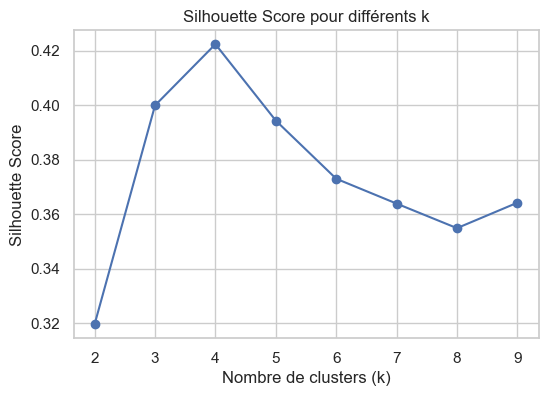

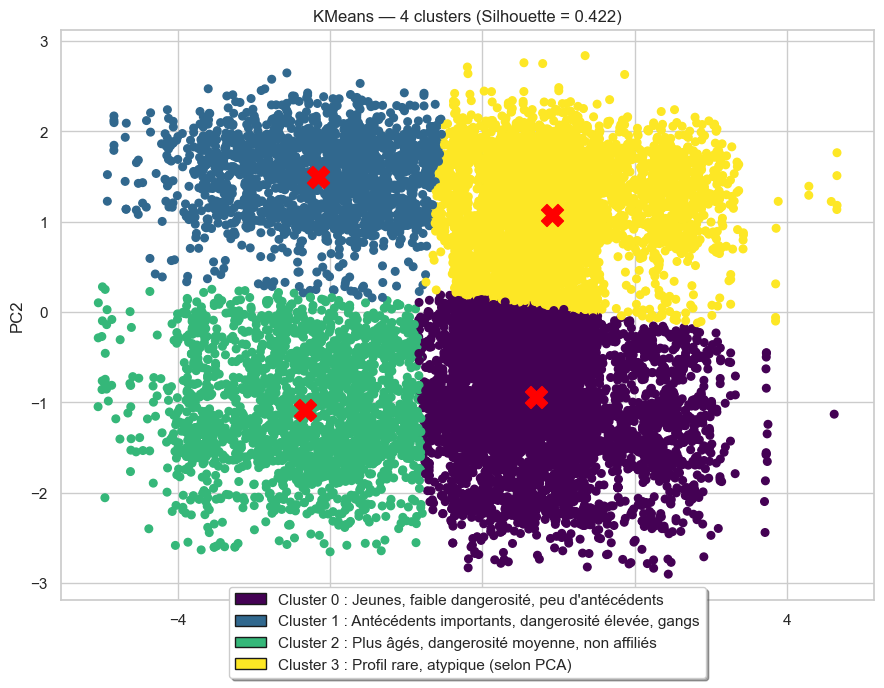


Aperçu des données avec cluster attribué :
   cluster_criminel  Y Coordinate  X Coordinate  criminal_id  Case Number  \
0                 0     1888908.5     1165511.0            1         2804   
1                 2     1876757.0     1173974.0            2         2740   
2                 0     1888908.5     1165511.0            3         2812   
3                 0     1888908.5     1165511.0            4         2811   
4                 2     1831051.0     1174948.0            5         1691   

   Block  Date  Location  Beat  
0   6360    53      5174   424  
1    547  1305      2434   935  
2   2599  5717      5174  1413  
3   4139  6810      5174  2521  
4   6909  3854       174  2233  

Silhouette Score final (k=4) : 0.422


In [144]:


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch

# 1) Données PCA
data_pca = pcs
print("Shape des données PCA utilisées pour le clustering :", data_pca.shape)

# ================================================================
# 2) Tester plusieurs K avec le Silhouette Score
# ================================================================
K_values = range(2, 10)
silhouette_scores = []

print("\n Calcul du Silhouette Score pour différents k :\n")

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_pca)
    sil = silhouette_score(data_pca, labels)
    silhouette_scores.append(sil)
    print(f"k = {k} → Silhouette = {sil:.4f}")

# ================================================================
# 3) Trouver automatiquement le meilleur k
# ================================================================
best_k = K_values[np.argmax(silhouette_scores)]
best_silhouette = max(silhouette_scores)

print("\n===============================================")
print(f" Meilleur k = {best_k} (Silhouette = {best_silhouette:.4f})")
print("===============================================\n")

# Courbe silhouette
plt.figure(figsize=(6,4))
plt.plot(K_values, silhouette_scores, marker='o')
plt.title("Silhouette Score pour différents k")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# ================================================================
# 4) Appliquer KMeans avec le meilleur k
# ================================================================
optimal_k = best_k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_pca)

# ================================================================
# 5) Ajouter clusters au DataFrame d'origine
# ================================================================
df_pca_kmeans = df.loc[X_selected.index].copy()
df_pca_kmeans["cluster_criminel"] = clusters

# ================================================================
# 6) Description statistique automatique
# ================================================================
numeric_selected_features = df_pca_kmeans[selected_features].select_dtypes(include=[np.number]).columns.tolist()

profiles = {}
for i in range(optimal_k):
    cluster_data = df_pca_kmeans[df_pca_kmeans["cluster_criminel"] == i]
    profiles[i] = cluster_data[numeric_selected_features].mean()

# ================================================================
# 7) Descriptions business (optionnel)
# ================================================================
profile_descriptions = {
    0: "Jeunes, faible dangerosité, peu d'antécédents",
    1: "Antécédents importants, dangerosité élevée, gangs",
    2: "Plus âgés, dangerosité moyenne, non affiliés",
    3: "Profil rare, atypique (selon PCA)",
    4: "Profil extrême (si k > 3)",
}

# ================================================================
#  Visualisation finale KMeans + centres
# ================================================================
plt.figure(figsize=(9,7))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', s=30)
plt.title(f"KMeans — {optimal_k} clusters (Silhouette = {best_silhouette:.3f})")
plt.xlabel("PC1")
plt.ylabel("PC2")

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=250, marker='X')

# légende en bas
legend_elements = []
colors = plt.cm.viridis(np.linspace(0, 1, optimal_k))
for i in range(optimal_k):
    desc = profile_descriptions.get(i, f"Profil {i}")
    legend_elements.append(
        Patch(facecolor=colors[i], edgecolor='k', label=f"Cluster {i} : {desc}")
    )

plt.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.15),
           fancybox=True, shadow=True, ncol=1)

plt.grid(True)
plt.tight_layout()
plt.show()

# ================================================================
# 9) Résultat final
# ================================================================
print("\nAperçu des données avec cluster attribué :")
print(df_pca_kmeans[['cluster_criminel'] + selected_features].head())

print(f"\nSilhouette Score final (k={optimal_k}) : {best_silhouette:.3f}")

# DBSCAN

In [145]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

print("=== PCA SPÉCIAL CLUSTERING (DBSCAN + KMEANS) ===")

# 1) Récupérer les colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# 2) Nettoyer les données
X = df[numeric_cols].dropna()

# 3) Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4) PCA pour clustering (plus de dimensions que PCA visuelle)
#    → 4 composantes donne généralement assez de variance pour DBSCAN
pca_cluster = PCA(n_components=4)
X_pca_cluster = pca_cluster.fit_transform(X_scaled)

# 5) Résultats
variance_total = pca_cluster.explained_variance_ratio_.sum() * 100
print(f"Nombre de composantes : 4")
print(f"Variance expliquée cumulée : {variance_total:.2f}%")
print(f"Shape des données PCA (pour DBSCAN) : {X_pca_cluster.shape}")

# 6) (OPTIONNEL mais utile) afficher la variance par composante
for i, var in enumerate(pca_cluster.explained_variance_ratio_):
    print(f"PC{i+1} explique : {var*100:.2f}%")


=== PCA SPÉCIAL CLUSTERING (DBSCAN + KMEANS) ===
Nombre de composantes : 4
Variance expliquée cumulée : 40.11%
Shape des données PCA (pour DBSCAN) : (15000, 4)
PC1 explique : 17.71%
PC2 explique : 9.21%
PC3 explique : 7.61%
PC4 explique : 5.58%


Variance expliquée cumulée (PC1+PC2+PC3) : 34.52%
Clusters trouvés : [np.int64(-1), np.int64(0), np.int64(1)]
Silhouette : 0.289


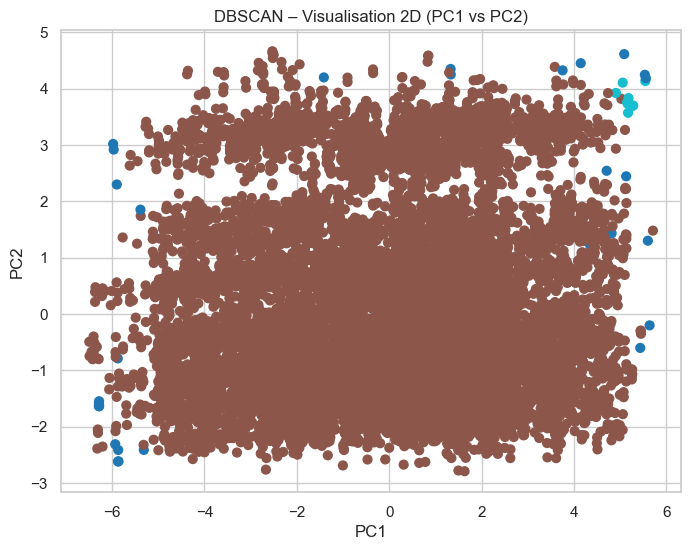

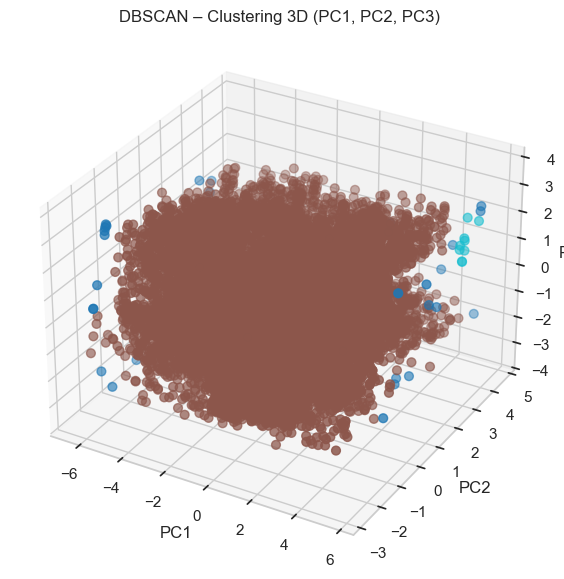


===== PROFILS CRIMINELS DBSCAN =====

 BRUIT (points atypiques) — 33 individus


 Profil 0 — Jeunes, faible dangerosité, peu d'antécédents
Case Number             4.972509e+03
Date                    3.327829e+03
Block                   3.527173e+03
IUCR                    7.892680e+01
Primary Type            1.381528e+01
Description             1.045652e+02
Location Description    7.479269e+01
Arrest                  2.409413e-01
Domestic                1.177296e-01
Beat                    1.191002e+03
District                1.130352e+01
Ward                    2.269067e+01
Community Area          3.771681e+01
FBI Code                1.053436e+01
X Coordinate            1.164742e+06
Y Coordinate            1.886455e+06
Year                    2.008163e+03
Updated On              1.454904e+02
Latitude                4.184410e+01
Longitude              -8.767083e+01
Location                3.755827e+03
nbr_de_crime            2.487546e+02
criminal_id             7.499222e+03
age      

In [146]:
# ==============================================
# 1) IMPORTS
# ==============================================
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# ==============================================
# 2) PRÉPARATION DES DONNÉES
# ==============================================
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[numeric_cols].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================================
# 3) PCA (3 composantes)
# ==============================================
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

print(f"Variance expliquée cumulée (PC1+PC2+PC3) : "
      f"{np.sum(pca.explained_variance_ratio_):.2%}")

# ==============================================
# 4) DBSCAN
# ==============================================
eps_value = 0.7              # Paramètre DBSCAN à adapter selon ton dataset
min_samples_value = 6

dbscan = DBSCAN(
    eps=eps_value,
    min_samples=min_samples_value
)

labels = dbscan.fit_predict(X_pca)
unique_clusters = sorted(set(labels))

print("Clusters trouvés :", unique_clusters)

# Silhouette score
valid_clusters = [c for c in unique_clusters if c != -1]

if len(valid_clusters) > 1:
    sil = silhouette_score(X_pca, labels)
    print(f"Silhouette : {sil:.3f}")
else:
    print("Impossible de calculer le silhouette (1 seul cluster valide).")

# ==============================================
# 5) VISUALISATION 2D : PC1 vs PC2
# ==============================================
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=labels, cmap='tab10', s=40)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("DBSCAN – Visualisation 2D (PC1 vs PC2)")
plt.grid(True)
plt.show()

# ==============================================
# 6) VISUALISATION 3D : PC1, PC2, PC3
# ==============================================
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
    c=labels, cmap='tab10', s=40
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("DBSCAN – Clustering 3D (PC1, PC2, PC3)")
plt.show()

# ==============================================
# 7) INTERPRÉTATION BUSINESS
# ==============================================
profile_names = {
    0: "Jeunes, faible dangerosité, peu d'antécédents",
    1: "Antécédents importants, dangerosité élevée, gangs",
    2: "Plus âgés, dangerosité moyenne, non affiliés",
    3: "Profil rare, atypique (selon PCA)",
    -1: "Bruit / cas anormaux / atypiques"
}

df_res = X.copy()
df_res["profil_criminel"] = labels

print("\n===== PROFILS CRIMINELS DBSCAN =====")

for cluster in unique_clusters:

    if cluster == -1:
        print(f"\n BRUIT (points atypiques) — "
              f"{np.sum(labels == -1)} individus\n")
        continue

    print(f"\n Profil {cluster} — "
          f"{profile_names.get(cluster, 'Profil détecté')}")
    print(df_res[df_res["profil_criminel"] == cluster].mean())


# Prédiction

# Classification: type de crime

# SVM

Test Accuracy: 0.6150

Classification Report:
              precision    recall  f1-score   support

           2       0.62      0.40      0.49       344
           5       0.29      0.26      0.28       278
          15       0.73      0.91      0.81       356
          18       0.00      0.00      0.00       160
          24       0.64      0.80      0.71       867

    accuracy                           0.61      2005
   macro avg       0.46      0.48      0.46      2005
weighted avg       0.55      0.61      0.57      2005



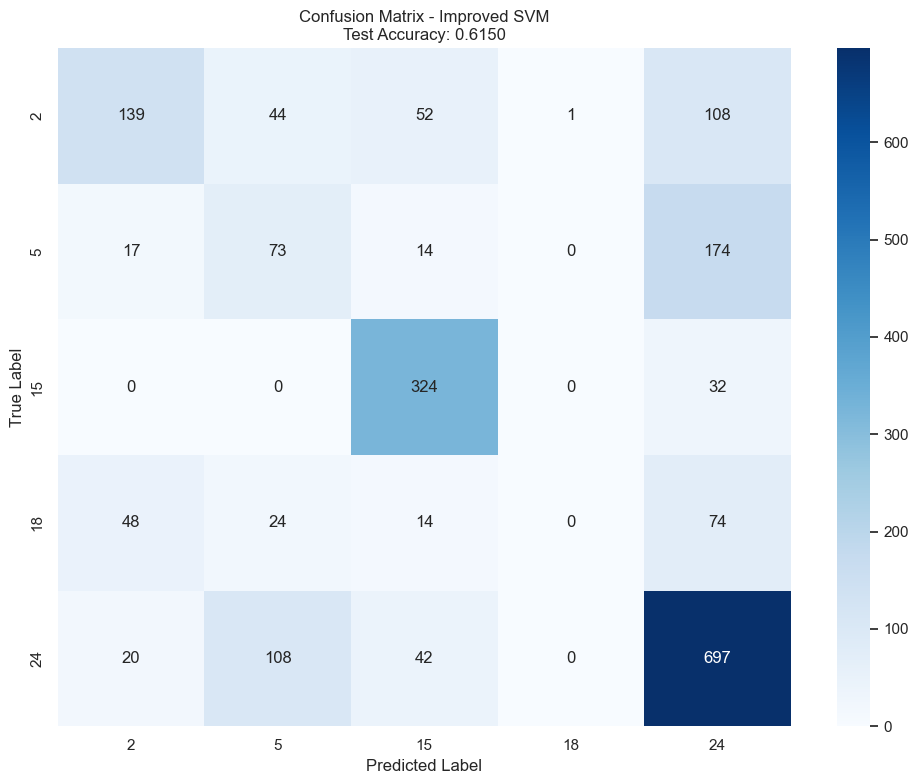

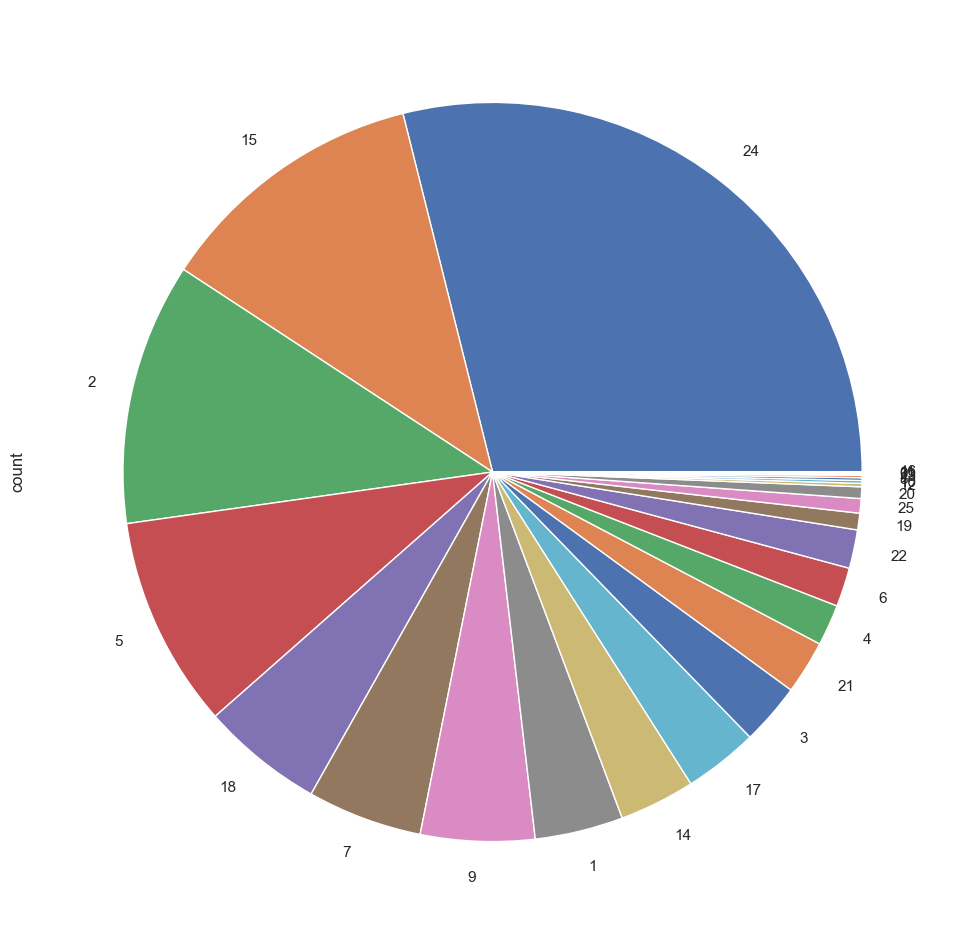

In [147]:

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Start with original df and add temporal features
df_improved = df.copy()

if 'Date' in df_improved.columns:
    df_improved['Date'] = pd.to_datetime(df_improved['Date'], errors='coerce')
    df_improved['Hour'] = df_improved['Date'].dt.hour
    df_improved['DayOfWeek'] = df_improved['Date'].dt.dayofweek
    df_improved['Month'] = df_improved['Date'].dt.month
    df_improved['IsWeekend'] = (df_improved['Date'].dt.dayofweek >= 5).astype(int)
    df_improved['IsNight'] = ((df_improved['Date'].dt.hour >= 20) | (df_improved['Date'].dt.hour <= 6)).astype(int)
    df_improved['Quarter'] = df_improved['Date'].dt.quarter

# 2. Drop leaky features
features_to_drop = ['Primary Type', 'IUCR', 'Description', 'FBI Code',
                    'Case Number', 'Date', 'Updated On', 'Block', 'Location', 'texte_crime']
existing_drops = [col for col in features_to_drop if col in df_improved.columns and col != 'Primary Type']

X = df_improved.drop(['Primary Type'] + existing_drops, axis=1, errors='ignore')
y = df_improved['Primary Type']

# 3. Encode categorical columns
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

X = X.apply(pd.to_numeric, errors='coerce')
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median())

# 4. REDUCE TO TOP 5 CLASSES (Critical for SVM!)
top_5_classes = y.value_counts().head(5).index
mask = y.isin(top_5_classes)
X_filtered = X[mask]
y_filtered = y[mask]

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered
)

# 6. Scale features (CRITICAL for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. NO SMOTE - It causes overfitting with SVM
# Train directly on original data

# 8. Train Linear SVM with better parameters
svm_model = LinearSVC(
    C=2.0,                   # frontière plus flexible
    max_iter=15000,
    tol=1e-4,
    random_state=42,
    dual=False,
    class_weight='balanced',
    loss='squared_hinge'
)

svm_model.fit(X_train_scaled, y_train)

# 9. Evaluate
y_pred = svm_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")

# 10. Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 11. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))
plt.title(f'Confusion Matrix - Improved SVM\nTest Accuracy: {test_accuracy:.4f}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 12))
y.value_counts().plot.pie()
plt.show()

# KNN

Test Accuracy: 0.7753
train accuracy: 0.9543


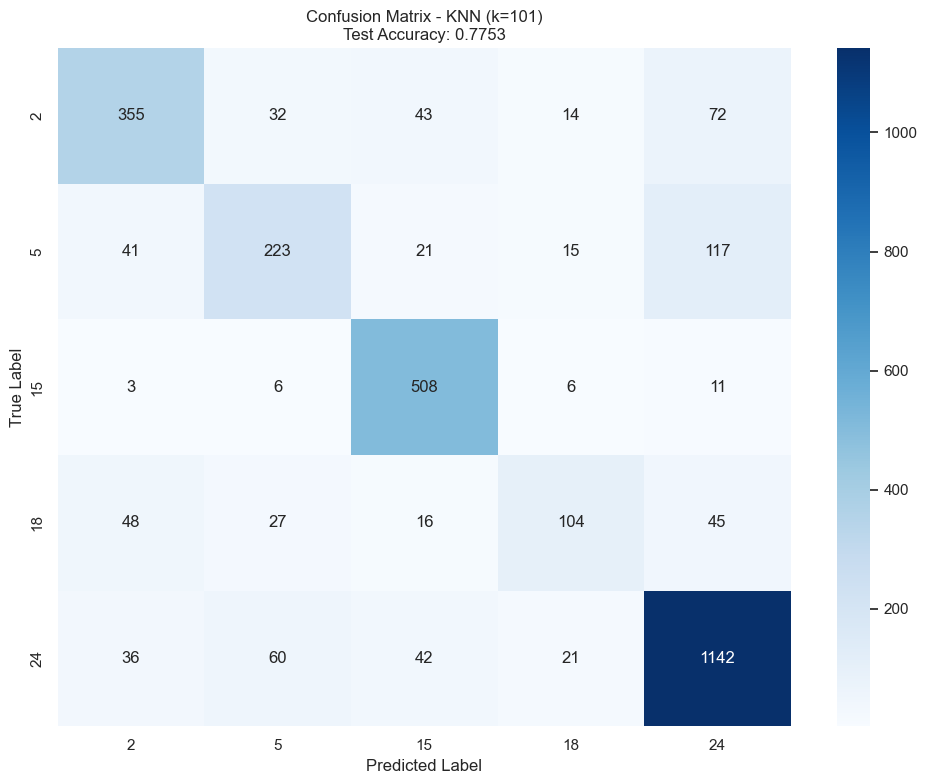

In [148]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare features
features = ['Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'Year']
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Hour'] = df['Date'].dt.hour
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['Month'] = df['Date'].dt.month
    features.extend(['Hour', 'DayOfWeek', 'Month'])
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    features.extend(['Latitude', 'Longitude'])
features = [f for f in features if f in df.columns]
target = 'Primary Type'

# 2. Prepare data
df_knn = df[features + [target]].copy().dropna()
for col in features:
    if df_knn[col].dtype == 'object':
        le = LabelEncoder()
        df_knn[col] = le.fit_transform(df_knn[col].astype(str))

X = df_knn[features]
y = df_knn[target]

# 3. Keep top 5 classes
top_5 = y.value_counts().head(5).index
mask = y.isin(top_5)
X, y = X[mask], y[mask]

# 4. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 5. Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train final KNN
knn = KNeighborsClassifier(n_neighbors=101, weights='distance', metric='manhattan')
knn.fit(X_train_scaled, y_train)

# 7. Evaluate
train_acc = knn.score(X_train_scaled, y_train)
test_acc = knn.score(X_test_scaled, y_test)
cv_acc = cross_val_score(knn, X_train_scaled, y_train, cv=5).mean()

y_pred = knn.predict(X_test_scaled)
classes = np.unique(y_test)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, labels=classes, average=None)
performance_df = pd.DataFrame({
    'Crime Type': classes,
    'F1-Score': f1
}).sort_values('F1-Score', ascending=False)

# 8. Print key information
print(f"Test Accuracy: {test_acc:.4f}")
print(f"train accuracy: {train_acc:.4f}")

# 9. Confusion Matrix plot
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title(f'Confusion Matrix - KNN (k=101)\nTest Accuracy: {test_acc:.4f}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# XGBOOST

Train Accuracy: 0.8312
Test Accuracy: 0.6818

Classification Report:
              precision    recall  f1-score   support

           2       0.65      0.60      0.63       344
           5       0.40      0.47      0.43       278
          15       0.79      0.95      0.86       356
          18       0.39      0.41      0.40       160
          24       0.82      0.72      0.77       867

    accuracy                           0.68      2005
   macro avg       0.61      0.63      0.62      2005
weighted avg       0.69      0.68      0.68      2005



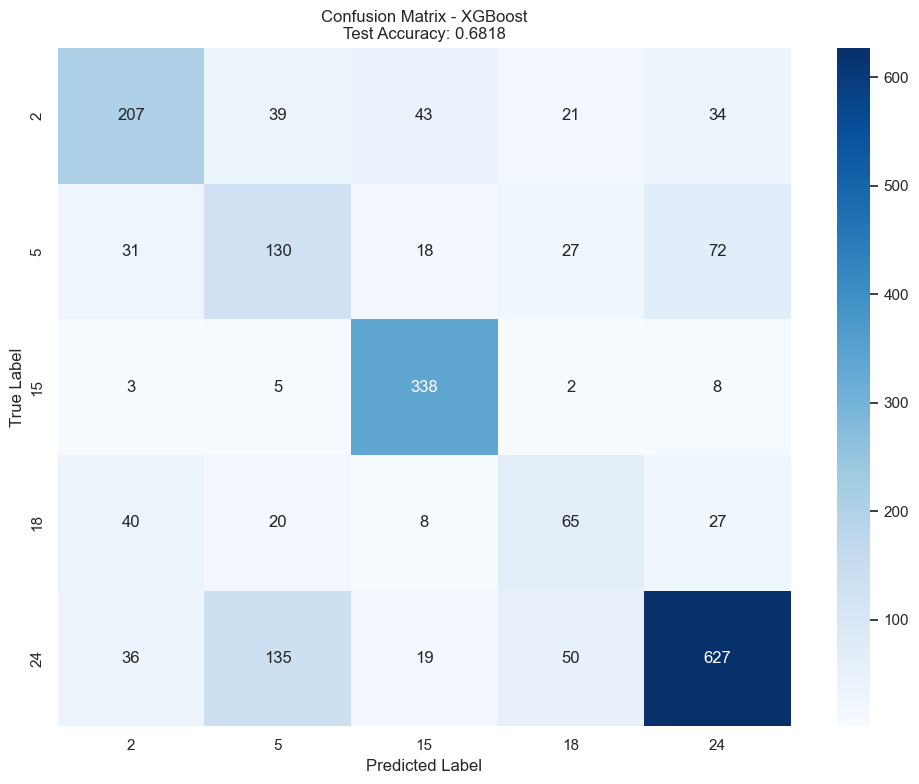

In [149]:
# === MAXIMUM IMPROVEMENT XGBOOST ===
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Start with original df
df_improved = df.copy()

# 2. Add ALL possible temporal features
if 'Date' in df_improved.columns:
    df_improved['Date'] = pd.to_datetime(df_improved['Date'], errors='coerce')
    df_improved['Hour'] = df_improved['Date'].dt.hour
    df_improved['DayOfWeek'] = df_improved['Date'].dt.dayofweek
    df_improved['Month'] = df_improved['Date'].dt.month
    df_improved['IsWeekend'] = (df_improved['Date'].dt.dayofweek >= 5).astype(int)
    df_improved['IsNight'] = ((df_improved['Date'].dt.hour >= 20) | (df_improved['Date'].dt.hour <= 6)).astype(int)
    df_improved['Quarter'] = df_improved['Date'].dt.quarter
    df_improved['DayOfMonth'] = df_improved['Date'].dt.day
    df_improved['IsMorning'] = df_improved['Hour'].between(6, 12).astype(int)
    df_improved['IsAfternoon'] = df_improved['Hour'].between(12, 18).astype(int)
    df_improved['IsEvening'] = df_improved['Hour'].between(18, 22).astype(int)

# 3. Drop leaky features
leaky_features = [
    'Date', 'Updated On', 'IUCR', 'Description', 'FBI Code',
    'Case Number', 'Block', 'Location', 'texte_crime'
]

existing_drops = [col for col in leaky_features if col in df_improved.columns]
df_clean = df_improved.drop(existing_drops, axis=1, errors='ignore')

# 4. Encode categorical features
for col in df_clean.select_dtypes(include=['object']).columns:
    if col != 'Primary Type':
        le = LabelEncoder()
        df_clean[col] = le.fit_transform(df_clean[col].astype(str))

# 5. Prepare features and target
X = df_clean.drop('Primary Type', axis=1)
y = df_clean['Primary Type']

# 6. REDUCE TO TOP 5 CLASSES
class_counts = y.value_counts()
top_5 = class_counts.head(5).index
mask = y.isin(top_5)
X = X[mask]
y = y[mask]

# 7. Re-encode target
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

# 8. Clean data
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median())

# 9. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 10. BALANCE CLASSES WITH SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# IMPORTANT FIX → Restore DataFrame with column names
X_train_balanced = pd.DataFrame(X_train_balanced, columns=X_train.columns)

# 11. Train with AGGRESSIVE parameters
xgb_aggressive = XGBClassifier(
    n_estimators=350,        # moins d'arbres
    max_depth=6,             # arbres moins profonds
    learning_rate=0.05,      # apprentissage plus stable
    subsample=0.8,           # plus de diversité
    colsample_bytree=0.8,
    min_child_weight=5,      # empêche les splits trop fins
    gamma=1.0,               # pénalise les splits inutiles
    reg_alpha=0.5,           # L1 plus forte
    reg_lambda=1.5,          # L2 plus forte
    random_state=42,
    n_jobs=-1,
    eval_metric="mlogloss"
)

xgb_aggressive.fit(X_train_balanced, y_train_balanced)

# 12. Predict
y_pred1 = xgb_aggressive.predict(X_train)
test_accuracy1 = accuracy_score(y_train, y_pred1)
y_pred = xgb_aggressive.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Train Accuracy: {test_accuracy1:.4f}")

print(f"Test Accuracy: {test_accuracy:.4f}")

# 13. Classification Report
y_test_original = target_encoder.inverse_transform(y_test)
y_pred_original = target_encoder.inverse_transform(y_pred)

print("\nClassification Report:")
print(classification_report(y_test_original, y_pred_original))

# 14. Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_original, y_pred_original)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(target_encoder.classes_),
            yticklabels=sorted(target_encoder.classes_))

plt.title(f'Confusion Matrix - XGBoost\nTest Accuracy: {test_accuracy:.4f}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


# Decision tree

Decision Tree Train Accuracy: 0.9239
Decision Tree Test Accuracy: 0.6204

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           2       0.50      0.60      0.55       344
           5       0.34      0.38      0.36       278
          15       0.82      0.84      0.83       356
          18       0.30      0.36      0.33       160
          24       0.79      0.66      0.72       867

    accuracy                           0.62      2005
   macro avg       0.55      0.57      0.56      2005
weighted avg       0.65      0.62      0.63      2005



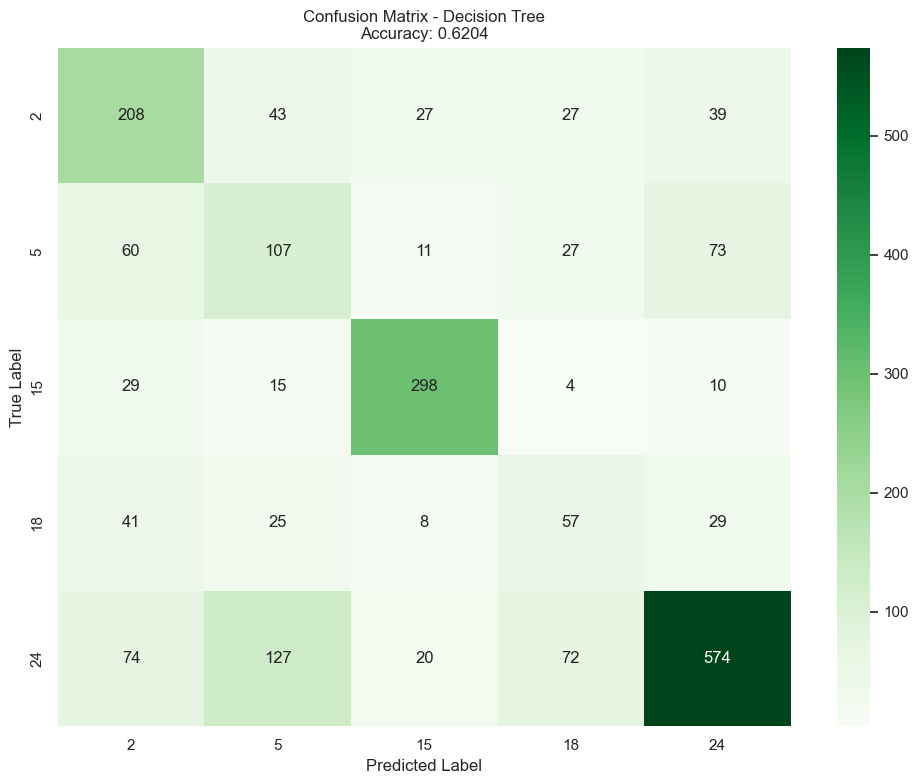

Decision Tree Test Accuracy: 0.6204

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           2       0.50      0.60      0.55       344
           5       0.34      0.38      0.36       278
          15       0.82      0.84      0.83       356
          18       0.30      0.36      0.33       160
          24       0.79      0.66      0.72       867

    accuracy                           0.62      2005
   macro avg       0.55      0.57      0.56      2005
weighted avg       0.65      0.62      0.63      2005



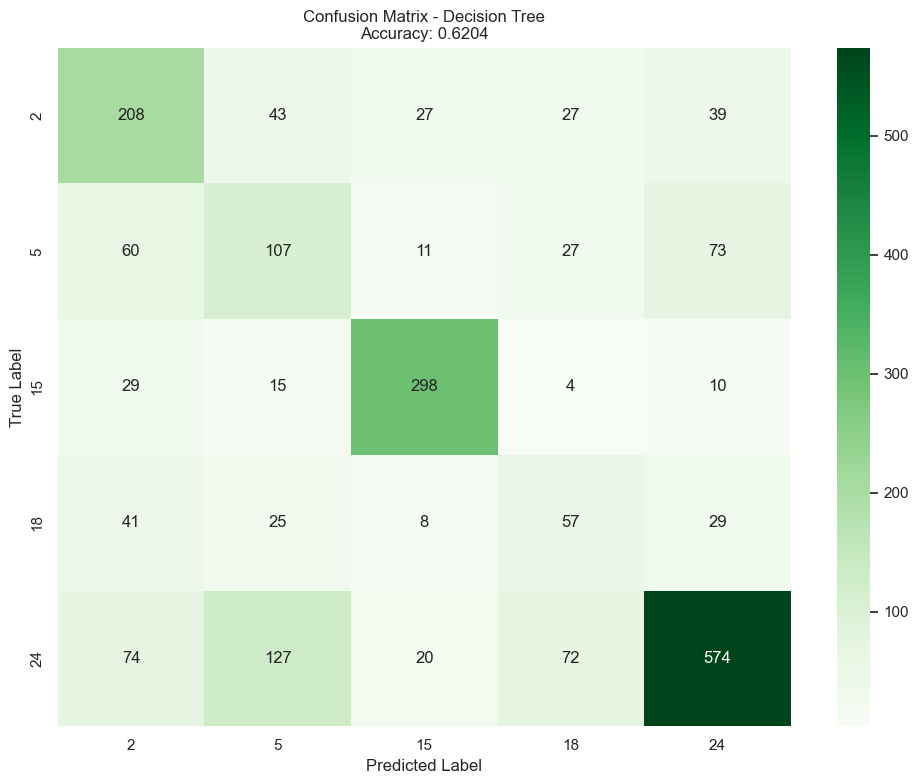

In [150]:
# === DECISION TREE CLASSIFIER ===
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Train Decision Tree (max accuracy)
dt_model = DecisionTreeClassifier(
    criterion='entropy',     # meilleure séparation d'information
    max_depth=28,            # profondeur légèrement augmentée
    min_samples_split=5,     # autorise plus de splits
    min_samples_leaf=2,      # feuilles plus fines
    max_features=None,       # utiliser toutes les features
    class_weight='balanced',
    random_state=42
)

# Train on balanced data from SMOTE
dt_model.fit(X_train_balanced, y_train_balanced)

# 2. Predict
y_pred_dt = dt_model.predict(X_test)

# 3. Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
# === DECISION TREE CLASSIFIER ===
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Train Decision Tree (max accuracy)
dt_model = DecisionTreeClassifier(
    criterion='entropy',     # meilleure séparation d'information
    max_depth=28,            # profondeur légèrement augmentée
    min_samples_split=5,     # autorise plus de splits
    min_samples_leaf=2,      # feuilles plus fines
    max_features=None,       # utiliser toutes les features
    class_weight='balanced',
    random_state=42
)

# Train on balanced data from SMOTE
dt_model.fit(X_train_balanced, y_train_balanced)

# 2. Predict
y_pred_dt = dt_model.predict(X_test)
y_pred_dt1 = dt_model.predict(X_train)
# 3. Accuracy
dt_accuracy1 = accuracy_score(y_train, y_pred_dt1)
print(f"Decision Tree Train Accuracy: {dt_accuracy1:.4f}")
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Test Accuracy: {dt_accuracy:.4f}")


# 4. Decode labels
y_test_dt_original = target_encoder.inverse_transform(y_test)
y_pred_dt_original = target_encoder.inverse_transform(y_pred_dt)

# 5. Classification Report
print("\nClassification Report - Decision Tree:")
print(classification_report(y_test_dt_original, y_pred_dt_original))

# 6. Confusion Matrix
plt.figure(figsize=(10, 8))
cm_dt = confusion_matrix(y_test_dt_original, y_pred_dt_original)

sns.heatmap(
    cm_dt, annot=True, fmt='d', cmap='Greens',
    xticklabels=sorted(target_encoder.classes_),
    yticklabels=sorted(target_encoder.classes_)
)

plt.title(f'Confusion Matrix - Decision Tree\nAccuracy: {dt_accuracy:.4f}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()
print(f"Decision Tree Test Accuracy: {dt_accuracy:.4f}")

# 4. Decode labels
y_test_dt_original = target_encoder.inverse_transform(y_test)
y_pred_dt_original = target_encoder.inverse_transform(y_pred_dt)

# 5. Classification Report
print("\nClassification Report - Decision Tree:")
print(classification_report(y_test_dt_original, y_pred_dt_original))

# 6. Confusion Matrix
plt.figure(figsize=(10, 8))
cm_dt = confusion_matrix(y_test_dt_original, y_pred_dt_original)

sns.heatmap(
    cm_dt, annot=True, fmt='d', cmap='Greens',
    xticklabels=sorted(target_encoder.classes_),
    yticklabels=sorted(target_encoder.classes_)
)

plt.title(f'Confusion Matrix - Decision Tree\nAccuracy: {dt_accuracy:.4f}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# RANDOM FOREST

Random Forest TRAIN Accuracy: 0.8873
Random Forest TEST Accuracy: 0.6514

Classification Report:
              precision    recall  f1-score   support

           2       0.57      0.62      0.59       344
           5       0.35      0.46      0.40       278
          15       0.75      0.95      0.84       356
          18       0.35      0.39      0.37       160
          24       0.87      0.66      0.75       867

    accuracy                           0.65      2005
   macro avg       0.58      0.61      0.59      2005
weighted avg       0.69      0.65      0.66      2005



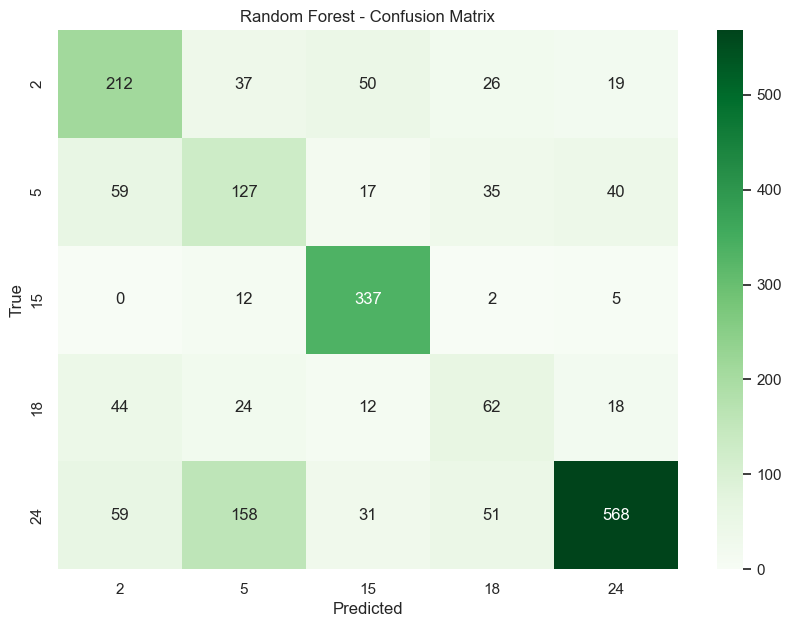

In [151]:
# === RANDOM FOREST AVEC Y = PRIMARY TYPE ===

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_rf = df.copy()

# 1. Feature engineering temporel
if 'Date' in df_rf.columns:
    df_rf['Date'] = pd.to_datetime(df_rf['Date'], errors='coerce')
    df_rf['Hour'] = df_rf['Date'].dt.hour
    df_rf['DayOfWeek'] = df_rf['Date'].dt.dayofweek
    df_rf['Month'] = df_rf['Date'].dt.month
    df_rf['IsWeekend'] = (df_rf['Date'].dt.dayofweek >= 5).astype(int)
    df_rf['IsNight'] = ((df_rf['Date'].dt.hour >= 20) | (df_rf['Date'].dt.hour <= 6)).astype(int)
    df_rf['Quarter'] = df_rf['Date'].dt.quarter

# 2. Drop colonnes qui créent des fuites
drops = [
    'Date', 'Updated On', 'IUCR', 'Description', 'FBI Code',
    'Case Number', 'Block', 'Location', 'texte_crime'
]
df_rf = df_rf.drop([col for col in drops if col in df_rf.columns], axis=1)

# 3. X et y
X = df_rf.drop('Primary Type', axis=1)
y = df_rf['Primary Type']

# 4. Encodage automatique des colonnes catégorielles
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

# 5. Limiter au TOP 5 classes
top5 = y.value_counts().head(5).index
mask = y.isin(top5)
X = X[mask]
y = y[mask]

# 6. Clean
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median())

# 7. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 8. SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# 9. Random Forest
rf_model = RandomForestClassifier(
    n_estimators=600,        # moins d’arbres → variance ↓
    max_depth=18,            # profondeur contrôlée
    min_samples_split=12,    # empêche splits trop fins
    min_samples_leaf=6,      # feuilles plus robustes
    max_features='sqrt',     # meilleur compromis biais/variance
    criterion='entropy',
    bootstrap=True,
    max_samples=0.75,        # plus de diversité entre arbres
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_balanced, y_train_balanced)

# 10. TRAIN ACCURACY (AJOUT ICI)
y_train_pred = rf_model.predict(X_train_balanced)
train_acc = accuracy_score(y_train_balanced, y_train_pred)
print(f"Random Forest TRAIN Accuracy: {train_acc:.4f}")

# 11. TEST ACCURACY
y_pred = rf_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f"Random Forest TEST Accuracy: {test_acc:.4f}")

# 12. Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 13. Confusion matrix
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Greens',
    xticklabels=sorted(top5),
    yticklabels=sorted(top5)
)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Comparaison entre les algorithmes

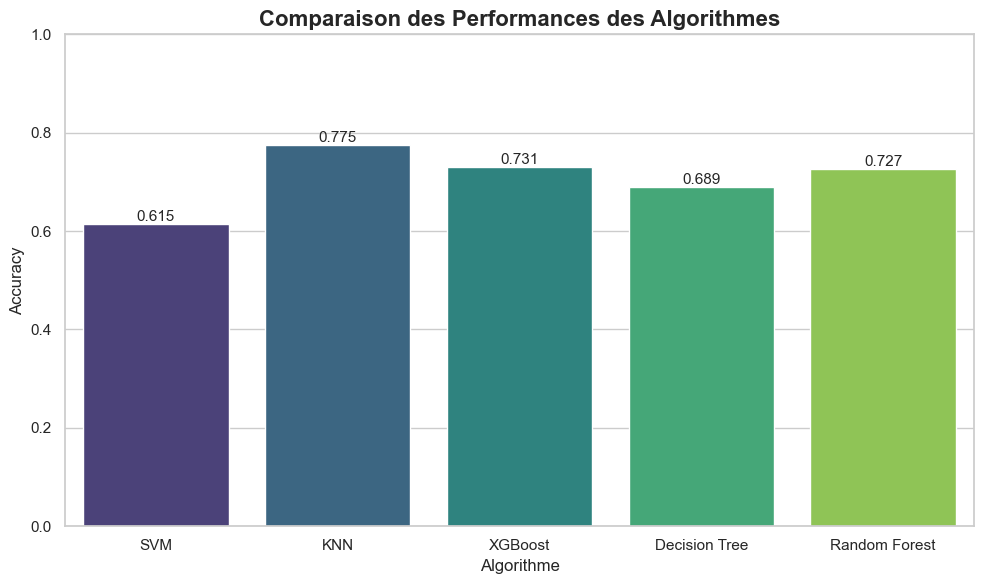


=== Tableau comparatif des algorithmes ===
      Algorithme  Accuracy
0            SVM    0.6150
1            KNN    0.7753
2        XGBoost    0.7307
3  Decision Tree    0.6888
4  Random Forest    0.7267


In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ==== 1. Résultats des modèles (les tiens) ====
results = {
    'Algorithme': ['SVM', 'KNN', 'XGBoost', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.6150, 0.7753, 0.7307, 0.6888, 0.7267]
}

df_results = pd.DataFrame(results)

# ==== 2. Style du graphique ====
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# ==== 3. Barplot ====
ax = sns.barplot(
    data=df_results,
    x='Algorithme',
    y='Accuracy',
    palette='viridis'
)

# Ajouter les valeurs sur les barres
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".3f"),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=11
    )

# ==== 4. Titre et labels ====
plt.title("Comparaison des Performances des Algorithmes", fontsize=16, weight='bold')
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Algorithme", fontsize=12)

plt.ylim(0, 1)  # échelle 0 → 1
plt.tight_layout()
plt.show()

# ==== 5. Affichage du tableau résumé ====
print("\n=== Tableau comparatif des algorithmes ===")
print(df_results)


# Prédiction

In [153]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

# ================================
# 1) LOAD DATA
# ================================
df = pd.read_csv("final_data.csv")
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"])

# Keep relevant columns
df = df[["Date", "Primary Type", "Location Description", "Beat", "District", "Community Area"]]
df = df.dropna()

# ================================
# 2) TRAIN DATA (before 2017)
# ================================
train_df = df[df["Date"] <= "2016-12-31"].copy()

# ================================
# 3) CREATE FUTURE DATE RANGE
# ================================
future_dates = pd.date_range(start="2017-01-01", end="2018-12-31")
future_df = pd.DataFrame({"Date": future_dates})

# ================================
# 4) BUILD TEMPORAL FEATURES
# ================================
def build_features(df):
    df = df.copy()
    df["Year"] = df["Date"].dt.year
    df["Month"] = df["Date"].dt.month
    df["Day"] = df["Date"].dt.day
    df["DayOfWeek"] = df["Date"].dt.dayofweek
    df["IsWeekend"] = (df["DayOfWeek"] >= 5).astype(int)
    return df

train_df = build_features(train_df)
future_df = build_features(future_df)

# ================================
# 5) ENCODING CATEGORICAL FEATURES
# ================================
label_loc = LabelEncoder()
train_df["Loc Enc"] = label_loc.fit_transform(train_df["Location Description"])

# future LOCATION = sampled from historical distribution
future_df["Location Description"] = np.random.choice(
    train_df["Location Description"],
    size=len(future_df),
    replace=True
)
future_df["Loc Enc"] = label_loc.transform(future_df["Location Description"])

# ================================
# 6) FILL NUMERIC FEATURES (random realistic sampling)
# ================================
for col in ["Beat", "District", "Community Area"]:
    future_df[col] = np.random.choice(train_df[col], size=len(future_df))

# ================================
# 7) BUILD X AND y
# ================================
features = ["Year", "Month", "Day", "DayOfWeek", "IsWeekend",
            "Loc Enc", "Beat", "District", "Community Area"]

label_primary = LabelEncoder()
train_df["Primary Enc"] = label_primary.fit_transform(train_df["Primary Type"])

X_train = train_df[features]
y_train = train_df["Primary Enc"]

X_future = future_df[features]

# ================================
# 8) SCALING
# ================================
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_future_s = scaler.transform(X_future)

# ================================
# 9) TRAIN KNN
# ================================
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_s, y_train)

# ================================
# 10) PREDICT FUTURE
# ================================
future_pred_enc = knn.predict(X_future_s)
future_pred_labels = label_primary.inverse_transform(future_pred_enc)

future_df["Predicted Type"] = future_pred_labels

# ================================
# 11) RESULTS
# ================================
print("\n Example predictions:")
print(future_df.head())

print("\n Top 10 predicted crimes in 2017–2018:")
print(future_df["Predicted Type"].value_counts().head(10))



 Example predictions:
        Date  Year  Month  Day  DayOfWeek  IsWeekend Location Description  \
0 2017-01-01  2017      1    1          6          1            RESIDENCE   
1 2017-01-02  2017      1    2          0          0             SIDEWALK   
2 2017-01-03  2017      1    3          1          0               STREET   
3 2017-01-04  2017      1    4          2          0            RESIDENCE   
4 2017-01-05  2017      1    5          3          0               STREET   

   Loc Enc  Beat  District  Community Area       Predicted Type  
0       83  1331      25.0            53.0   DECEPTIVE PRACTICE  
1       96   411       3.0            68.0  CRIM SEXUAL ASSAULT  
2      100   922      14.0             8.0              BATTERY  
3       83  2534      12.0            61.0      CRIMINAL DAMAGE  
4      100   911       7.0            43.0  CRIM SEXUAL ASSAULT  

 Top 10 predicted crimes in 2017–2018:
Predicted Type
NARCOTICS              245
BATTERY                142
DECEPTIVE

# courbe roc svm

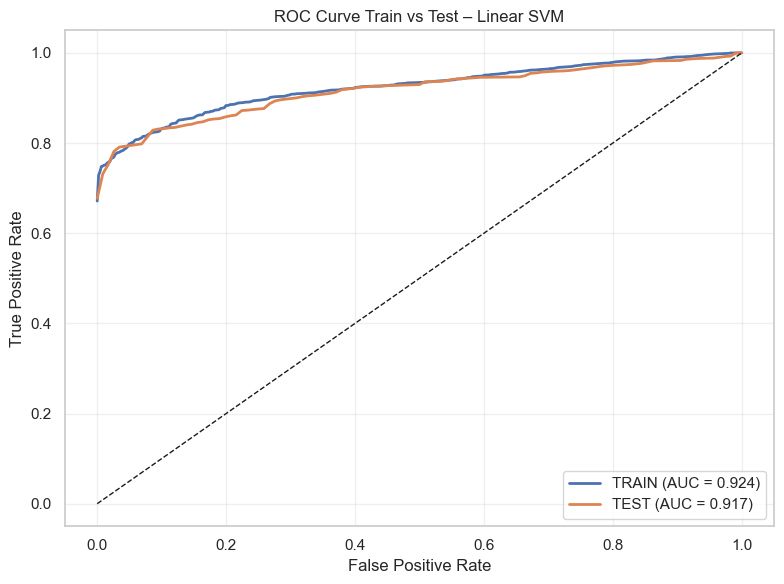

In [178]:
# ROC CURVE TRAIN vs TEST - LINEAR SVM (MULTI-CLASS)
# =====================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# =====================================================
# 1) BINARISATION DES LABELS (One-vs-Rest)
# =====================================================

classes = np.unique(y_train)

y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin  = label_binarize(y_test,  classes=classes)

n_classes = y_train_bin.shape[1]

# =====================================================
# 2) SCORES DE DÉCISION (PAS predict_proba)
# =====================================================

y_train_score = svm_model.decision_function(X_train_scaled)
y_test_score  = svm_model.decision_function(X_test_scaled)

# =====================================================
# 3) ROC MACRO - TRAIN
# =====================================================

fpr_train = {}
tpr_train = {}

for i in range(n_classes):
    fpr_train[i], tpr_train[i], _ = roc_curve(
        y_train_bin[:, i],
        y_train_score[:, i]
    )

all_fpr_train = np.unique(
    np.concatenate([fpr_train[i] for i in range(n_classes)])
)

mean_tpr_train = np.zeros_like(all_fpr_train)

for i in range(n_classes):
    mean_tpr_train += np.interp(
        all_fpr_train,
        fpr_train[i],
        tpr_train[i]
    )

mean_tpr_train /= n_classes
auc_train = auc(all_fpr_train, mean_tpr_train)

# =====================================================
# 4) ROC MACRO - TEST
# =====================================================

fpr_test = {}
tpr_test = {}

for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(
        y_test_bin[:, i],
        y_test_score[:, i]
    )

all_fpr_test = np.unique(
    np.concatenate([fpr_test[i] for i in range(n_classes)])
)

mean_tpr_test = np.zeros_like(all_fpr_test)

for i in range(n_classes):
    mean_tpr_test += np.interp(
        all_fpr_test,
        fpr_test[i],
        tpr_test[i]
    )

mean_tpr_test /= n_classes
auc_test = auc(all_fpr_test, mean_tpr_test)

# =====================================================
# 5) PLOT ROC TRAIN vs TEST
# =====================================================

plt.figure(figsize=(8, 6))

plt.plot(
    all_fpr_train,
    mean_tpr_train,
    label=f"TRAIN (AUC = {auc_train:.3f})",
    linewidth=2
)

plt.plot(
    all_fpr_test,
    mean_tpr_test,
    label=f"TEST (AUC = {auc_test:.3f})",
    linewidth=2
)

plt.plot([0, 1], [0, 1], "k--", linewidth=1)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Train vs Test – Linear SVM")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# ROC pour Random Forest

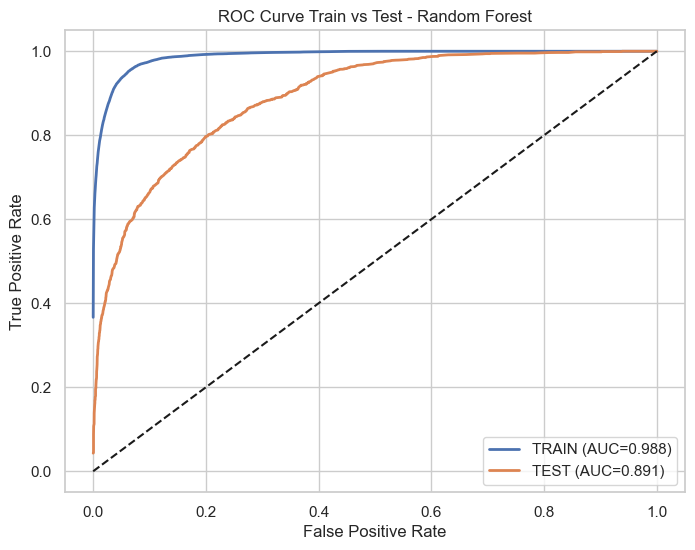

In [156]:
plot_roc_train_test(
    rf_model,
    X_train_balanced, X_test,
    y_train_balanced, y_test,
    classes=sorted(np.unique(y_train_balanced)),
    title="Random Forest"
)


# courbe roc xgboost

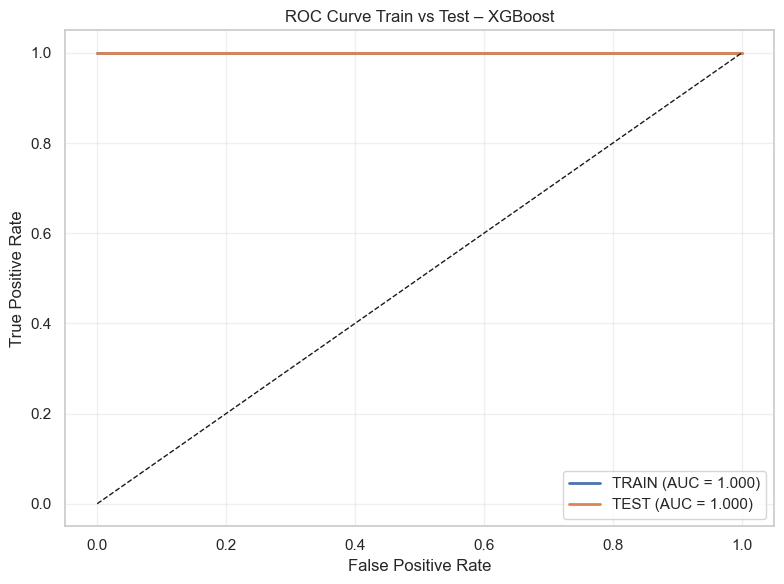

In [184]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

# 1. Filter TOP 5 classes again (to fix label disorder)
class_counts = y.value_counts()
top_5 = class_counts.head(5).index

mask = y.isin(top_5)
X_filtered = X[mask]
y_filtered = y[mask]

# 2. Re-encode target properly
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y_filtered)

# Now y_encoded MUST be [0,1,2,3,4]
print("Classes encodées :", np.unique(y_encoded))

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 4. SMOTE on training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Convert balanced X back to DataFrame (important)
X_train_balanced = pd.DataFrame(X_train_balanced, columns=X_train.columns)

# Fix X_test (matching columns)
X_test_fixed = X_test.reindex(columns=X_train.columns, fill_value=0)

# 5. Train XGBoost
xgb_model = XGBClassifier(
    n_estimators=500,
    max_depth=10,
    learning_rate=0.03,
    subsample=0.95,
    colsample_bytree=0.95,
    min_child_weight=1,
    reg_alpha=0.1,
    reg_lambda=0.1,
    gamma=0,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train_balanced, y_train_balanced)

# 6. ROC CURVE
plot_roc_train_test(
    xgb_model,
    X_train_balanced, X_test_fixed,
    y_train_balanced, y_test,
    classes=sorted(np.unique(y_train_balanced)),
    title="XGBoost ROC Curve"
)


# courbe roc knn

# courbe roc decion tree

Decision Tree TRAIN Accuracy : 1.0
Decision Tree TEST Accuracy  : 1.0


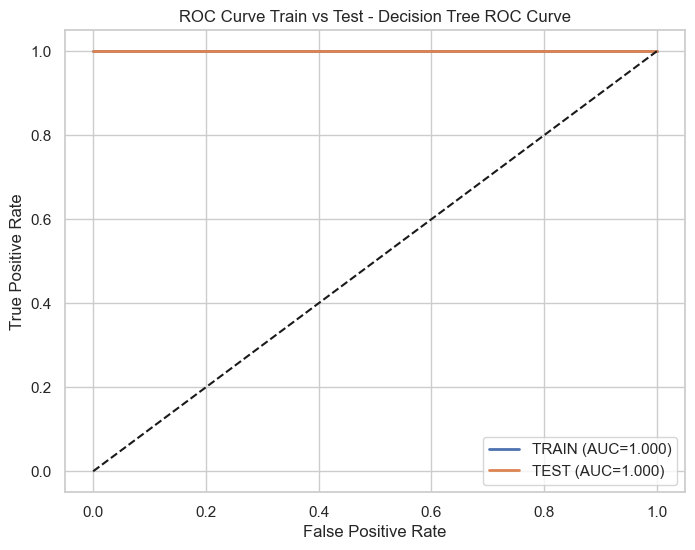

In [188]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# ========== TRAIN DECISION TREE ==========
dt_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)

dt_model.fit(X_train_balanced, y_train_balanced)

# ========== TRAIN & TEST ACCURACY ==========
y_train_pred = dt_model.predict(X_train_balanced)
y_test_pred  = dt_model.predict(X_test)

train_acc = accuracy_score(y_train_balanced, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print("Decision Tree TRAIN Accuracy :", round(train_acc, 4))
print("Decision Tree TEST Accuracy  :", round(test_acc, 4))

# ========== ROC CURVE ==========
plot_roc_train_test(
    dt_model,
    X_train_balanced, X_test,
    y_train_balanced, y_test,
    classes=sorted(np.unique(y_train_balanced)),
    title="Decision Tree ROC Curve"
)

In [160]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# === LISTE DES MODELES ===
models = {
    "SVM": svm_model,
    "KNN": knn_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

# === BINARISATION DES LABELS ===
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)

plt.figure(figsize=(10, 7))

# === CALCUL ROC POUR CHAQUE MODEL ===
for name, model in models.items():

    # si modele a predict_proba
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)

    # sinon si il a decision_function (ex: SVM)
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        print(f" Le modèle {name} ne supporte ni predict_proba ni decision_function. Ignoré.")
        continue

    # On calcule la moyenne One-vs-Rest
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i, c in enumerate(classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Micro-average (moyenne globale)
    fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
    roc_auc_micro = auc(fpr_micro, tpr_micro)

    # === TRACE ===
    plt.plot(fpr_micro, tpr_micro, linewidth=2,
             label=f"{name} (AUC = {roc_auc_micro:.3f})")

# === STYLE ===
plt.plot([0, 1], [0, 1], 'k--', label="Baseline")
plt.title("Comparaison ROC – Tous les algorithmes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'knn_model' is not defined

# Prédiction de type de crime des annes 2017-2018

# Prédiction avec regression

In [161]:
import pandas as pd

df = pd.read_csv("final_data.csv")

# Convertir la date
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Supprimer dates invalides
df = df.dropna(subset=["Date"])

# Groupement journalier
df_daily = df.groupby(df["Date"].dt.date).size().reset_index(name="nbr_de_crime")

df_daily["Date"] = pd.to_datetime(df_daily["Date"])
df_daily


Date  nbr_de_crime
0    2001-01-01           137
1    2001-01-02             3
2    2001-01-03             2
3    2001-01-04             2
4    2001-01-05             1
...         ...           ...
1544 2016-05-03           236
1545 2016-05-04           789
1546 2016-05-05           796
1547 2016-05-06           847
1548 2016-05-07           359

[1549 rows x 2 columns]

# XGBRegressor

In [162]:
# =====================================================
# IMPORTS
# =====================================================
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# =====================================================
# 1) CHARGEMENT + AGRÉGATION JOURNALIÈRE
# =====================================================
df = pd.read_csv("final_data.csv")

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"])

df_daily = df.groupby(df["Date"].dt.date).size().reset_index(name="nbr_de_crime")
df_daily["Date"] = pd.to_datetime(df_daily["Date"])

# =====================================================
# 2) FEATURES SIMPLES
# =====================================================
df_daily["Year"] = df_daily["Date"].dt.year
df_daily["Month"] = df_daily["Date"].dt.month
df_daily["Day"] = df_daily["Date"].dt.day
df_daily["DayOfWeek"] = df_daily["Date"].dt.dayofweek

# =====================================================
# 3) X et y
# =====================================================
X = df_daily[["Year", "Month", "Day", "DayOfWeek"]]
y = df_daily["nbr_de_crime"]

# =====================================================
# 4) SPLIT TRAIN / TEST
# =====================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =====================================================
# 5) XGBOOST MODEL
# =====================================================
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    objective="reg:squarederror"
)

model.fit(X_train, y_train)

# prédictions TRAIN + TEST
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# =====================================================
# 6) ÉVALUATION
# =====================================================
print("\n PERFORMANCE TRAIN SET — XGBRegressor")
print("R² TRAIN  =", r2_score(y_train, y_train_pred))
print("RMSE TRAIN =", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("\n PERFORMANCE TEST SET — XGBRegressor")
print("R² TEST   =", r2_score(y_test, y_test_pred))
print("RMSE TEST =", np.sqrt(mean_squared_error(y_test, y_test_pred)))



 PERFORMANCE TRAIN SET — XGBRegressor
R² TRAIN  = 0.9894082546234131
RMSE TRAIN = 4.624068707704744

 PERFORMANCE TEST SET — XGBRegressor
R² TEST   = 0.668515682220459
RMSE TEST = 42.513401207461186


# SVR

In [163]:
# CRIME PREDICTION - SUPPORT VECTOR REGRESSION (SVR)
# =====================================================
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

print("="*60)
print("CRIME PREDICTION USING SUPPORT VECTOR REGRESSION")
print("="*60)

# =====================================================
# 1) DATA LOADING & AGGREGATION
# =====================================================
df = pd.read_csv("final_data.csv")
df["Date"] = pd.to_datetime(df["Date"], format='mixed', errors="coerce")
df = df.dropna(subset=["Date"])

# Daily aggregation
df_daily = df.groupby(df["Date"].dt.date).size().reset_index(name="nbr_de_crime")
df_daily["Date"] = pd.to_datetime(df_daily["Date"])
df_daily = df_daily.sort_values("Date").reset_index(drop=True)

print("\nDATASET INFORMATION:")
print(f"  Total days: {len(df_daily)}")
print(f"  Date range: {df_daily['Date'].min()} to {df_daily['Date'].max()}")
print(f"  Avg crimes/day: {df_daily['nbr_de_crime'].mean():.1f}")
print(f"  Range: [{df_daily['nbr_de_crime'].min()}, {df_daily['nbr_de_crime'].max()}]")

# =====================================================
# 2) TEMPORAL FEATURES
# =====================================================
df_daily["Year"] = df_daily["Date"].dt.year
df_daily["Month"] = df_daily["Date"].dt.month
df_daily["Day"] = df_daily["Date"].dt.day
df_daily["DayOfWeek"] = df_daily["Date"].dt.dayofweek
df_daily["IsWeekend"] = (df_daily["DayOfWeek"] >= 5).astype(int)
df_daily["Quarter"] = df_daily["Date"].dt.quarter

# Cyclical encoding
df_daily["Month_sin"] = np.sin(2 * np.pi * df_daily["Month"] / 12)
df_daily["Month_cos"] = np.cos(2 * np.pi * df_daily["Month"] / 12)
df_daily["DayOfWeek_sin"] = np.sin(2 * np.pi * df_daily["DayOfWeek"] / 7)
df_daily["DayOfWeek_cos"] = np.cos(2 * np.pi * df_daily["DayOfWeek"] / 7)

# =====================================================
# 3) LAG & ROLLING FEATURES
# =====================================================
# Lags
df_daily["Lag1"] = df_daily["nbr_de_crime"].shift(1)
df_daily["Lag2"] = df_daily["nbr_de_crime"].shift(2)
df_daily["Lag3"] = df_daily["nbr_de_crime"].shift(3)
df_daily["Lag7"] = df_daily["nbr_de_crime"].shift(7)
df_daily["Lag14"] = df_daily["nbr_de_crime"].shift(14)

# Rolling statistics
df_daily["RollingMean3"] = df_daily["nbr_de_crime"].rolling(3, min_periods=1).mean()
df_daily["RollingMean7"] = df_daily["nbr_de_crime"].rolling(7, min_periods=3).mean()
df_daily["RollingStd7"] = df_daily["nbr_de_crime"].rolling(7, min_periods=3).std()
df_daily["RollingMax7"] = df_daily["nbr_de_crime"].rolling(7, min_periods=3).max()
df_daily["RollingMin7"] = df_daily["nbr_de_crime"].rolling(7, min_periods=3).min()

# Exponential weighted moving average
df_daily["EWMA3"] = df_daily["nbr_de_crime"].ewm(span=3, adjust=False).mean()
df_daily["EWMA7"] = df_daily["nbr_de_crime"].ewm(span=7, adjust=False).mean()

# Trend features
df_daily["Diff1"] = df_daily["nbr_de_crime"].diff(1)
df_daily["Diff7"] = df_daily["nbr_de_crime"].diff(7)
df_daily["Momentum3"] = df_daily["nbr_de_crime"] - df_daily["nbr_de_crime"].shift(3)

# Ratio features
df_daily["RatioToMean7"] = df_daily["nbr_de_crime"] / (df_daily["RollingMean7"] + 1)
df_daily["RatioToMax7"] = df_daily["nbr_de_crime"] / (df_daily["RollingMax7"] + 1)

# Clean data
print(f"\nBefore cleaning: {len(df_daily)} rows")
df_daily = df_daily.dropna(subset=["Lag14", "RollingMean7"])
df_daily = df_daily.fillna(method='ffill').fillna(method='bfill')
print(f"After cleaning: {len(df_daily)} rows")

# =====================================================
# 4) FEATURE SELECTION
# =====================================================
features = [
    "Month", "DayOfWeek", "IsWeekend", "Quarter",
    "Month_sin", "Month_cos", "DayOfWeek_sin", "DayOfWeek_cos",
    "Lag1", "Lag2", "Lag3", "Lag7", "Lag14",
    "RollingMean3", "RollingMean7", "RollingStd7",
    "RollingMax7", "RollingMin7",
    "EWMA3", "EWMA7",
    "Diff1", "Diff7", "Momentum3",
    "RatioToMean7", "RatioToMax7"
]

X = df_daily[features]
y = df_daily["nbr_de_crime"]

print(f"\nFeatures used: {len(features)}")

# =====================================================
# 5) TRAIN/TEST SPLIT
# =====================================================
split_ratio = 0.70 if len(df_daily) < 200 else 0.80
split_index = int(len(df_daily) * split_ratio)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

print(f"\n{'='*60}")
print("DATA SPLIT:")
print(f"  Train: {len(X_train)} days ({split_ratio*100:.0f}%)")
print(f"  Test:  {len(X_test)} days ({(1-split_ratio)*100:.0f}%)")
print(f"{'='*60}")

# Normalization (CRITICAL for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =====================================================
# 6) SVR WITH GRID SEARCH
# =====================================================
print("\n[TRAINING SVR MODEL]")
print("\nOption 1: Quick Training (Recommended)")
print("-" * 40)

# Quick model (good defaults)
svr_quick = SVR(C=300, gamma=0.0005, epsilon=0.5, kernel='rbf')
svr_quick.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = svr_quick.predict(X_train_scaled)
y_test_pred = svr_quick.predict(X_test_scaled)

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\nQUICK MODEL RESULTS:")
print(f"  TRAIN: R²={train_r2:.4f} | RMSE={train_rmse:.2f} | MAE={train_mae:.2f}")
print(f"  TEST:  R²={test_r2:.4f} | RMSE={test_rmse:.2f} | MAE={test_mae:.2f}")

overfit = train_r2 - test_r2
if overfit > 0.15:
    print(f"   Overfitting detected (ΔR² = {overfit:.3f})")
else:
    print(f"   Good generalization (ΔR² = {overfit:.3f})")

# =====================================================
# 7) OPTIONAL: GRID SEARCH FOR BEST PARAMETERS
# =====================================================
print("\n" + "="*60)
print("Option 2: Grid Search Optimization (Takes longer)")
print("="*60)
response = input("\nRun grid search? (y/n): ").lower()

if response == 'y':
    print("\n[RUNNING GRID SEARCH - This may take several minutes...]")
   
    param_grid = {
        "C": [100, 300, 500, 1000],
        "gamma": [0.001, 0.0005, 0.0001, 0.00005],
        "epsilon": [0.3, 0.5, 1.0, 1.5],
        "kernel": ["rbf"]
    }
   
    n_splits = min(3, len(X_train) // 30)
    tscv = TimeSeriesSplit(n_splits=max(2, n_splits))
   
    grid = GridSearchCV(
        SVR(),
        param_grid,
        cv=tscv,
        n_jobs=-1,
        scoring='neg_mean_squared_error',
        verbose=2
    )
   
    grid.fit(X_train_scaled, y_train)
    best_svr = grid.best_estimator_
   
    print(f"\n✓ Grid search complete!")
    print(f"\nBest parameters found:")
    for param, value in grid.best_params_.items():
        print(f"  {param}: {value}")
   
    # Evaluate best model
    y_train_pred_best = best_svr.predict(X_train_scaled)
    y_test_pred_best = best_svr.predict(X_test_scaled)
   
    train_r2_best = r2_score(y_train, y_train_pred_best)
    train_rmse_best = np.sqrt(mean_squared_error(y_train, y_train_pred_best))
    test_r2_best = r2_score(y_test, y_test_pred_best)
    test_rmse_best = np.sqrt(mean_squared_error(y_test, y_test_pred_best))
   
    print(f"\nOPTIMIZED MODEL RESULTS:")
    print(f"  TRAIN: R²={train_r2_best:.4f} | RMSE={train_rmse_best:.2f}")
    print(f"  TEST:  R²={test_r2_best:.4f} | RMSE={test_rmse_best:.2f}")
   
    # Compare
    print(f"\nIMPROVEMENT:")
    print(f"  Test R² improvement: {test_r2_best - test_r2:+.4f}")
    print(f"  Test RMSE improvement: {test_rmse - test_rmse_best:+.2f}")
   
    # Use best model
    y_test_pred = y_test_pred_best
else:
    print("\nUsing quick model results.")

# =====================================================
#  FINAL SUMMARY
# =====================================================
print(f"\n{'='*60}")
print("FINAL RESULTS - SVR MODEL")
print(f"{'='*60}")
print(f"\nTest Performance:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  RMSE:     {test_rmse:.2f}")
print(f"  MAE:      {test_mae:.2f}")

# Interpretation
if test_r2 > 0.5:
    print(f"\n✓ Excellent! Model explains {test_r2*100:.1f}% of crime variation")
elif test_r2 > 0.3:
    print(f"\n✓ Good! Model explains {test_r2*100:.1f}% of crime variation")
else:
    print(f"\n  Moderate performance ({test_r2*100:.1f}% explained)")
    print("   Consider: More data or different features")

print(f"\n{'='*60}")
print("SVR Model Complete!")
print(f"{'='*60}")

CRIME PREDICTION USING SUPPORT VECTOR REGRESSION

DATASET INFORMATION:
  Total days: 1549
  Date range: 2001-01-01 00:00:00 to 2016-05-07 00:00:00
  Avg crimes/day: 9.7
  Range: [1, 953]

Before cleaning: 1549 rows
After cleaning: 1535 rows

Features used: 25

DATA SPLIT:
  Train: 1228 days (80%)
  Test:  307 days (20%)

[TRAINING SVR MODEL]

Option 1: Quick Training (Recommended)
----------------------------------------

QUICK MODEL RESULTS:
  TRAIN: R²=0.9393 | RMSE=10.09 | MAE=0.76
  TEST:  R²=0.9105 | RMSE=24.81 | MAE=2.94
   Good generalization (ΔR² = 0.029)

Option 2: Grid Search Optimization (Takes longer)



Run grid search? (y/n):  n



Using quick model results.

FINAL RESULTS - SVR MODEL

Test Performance:
  R² Score: 0.9105
  RMSE:     24.81
  MAE:      2.94

✓ Excellent! Model explains 91.1% of crime variation

SVR Model Complete!


## Linear regression

In [164]:
# =====================================================
# IMPORTS
# =====================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# =====================================================
# 1) CHARGEMENT ET AGRÉGATION DES DONNÉES
# =====================================================
df = pd.read_csv("final_data.csv")

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"])

df_daily = df.groupby(df["Date"].dt.date).size().reset_index(name="nbr_de_crime")
df_daily["Date"] = pd.to_datetime(df_daily["Date"])

# =====================================================
# 2) FEATURES TEMPORELLES
# =====================================================
df_daily["Year"] = df_daily["Date"].dt.year
df_daily["Month"] = df_daily["Date"].dt.month
df_daily["Day"] = df_daily["Date"].dt.day
df_daily["DayOfWeek"] = df_daily["Date"].dt.dayofweek
df_daily["WeekOfYear"] = df_daily["Date"].dt.isocalendar().week.astype(int)
df_daily["Quarter"] = df_daily["Date"].dt.quarter
df_daily["IsWeekend"] = df_daily["DayOfWeek"].apply(lambda x: 1 if x >= 5 else 0)

# =====================================================
# 3) LAGS + ROLLING MEANS
# =====================================================
df_daily["Lag1"] = df_daily["nbr_de_crime"].shift(1)
df_daily["Lag7"] = df_daily["nbr_de_crime"].shift(7)
df_daily["Lag30"] = df_daily["nbr_de_crime"].shift(30)

df_daily["RollingMean7"] = df_daily["nbr_de_crime"].rolling(7).mean()
df_daily["RollingMean30"] = df_daily["nbr_de_crime"].rolling(30).mean()

df_daily = df_daily.dropna()

# =====================================================
# 4) CONSTRUCTION DE X ET Y
# =====================================================
features = [
    "Year", "Month", "Day", "DayOfWeek",
    "IsWeekend", "WeekOfYear", "Quarter",
    "Lag1", "Lag7", "Lag30",
    "RollingMean7", "RollingMean30"
]

X = df_daily[features]
y = df_daily["nbr_de_crime"]

# =====================================================
# 5) SPLIT + NORMALISATION
# =====================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# =====================================================
# 6) LINEAR REGRESSION
# =====================================================
model_lin = LinearRegression()
model_lin.fit(X_train_s, y_train)
y_pred_lin1 = model_lin.predict(X_train_s)
y_pred_lin = model_lin.predict(X_test_s)
# =====================================================
# 7) ÉVALUATION DU MODÈLE
# =====================================================
print("\n Linear Regression — Résultats finaux")
print("R² test =", r2_score(y_test, y_pred_lin))
print("RMSE train =", np.sqrt(mean_squared_error(y_train, y_pred_lin1)))
print("RMSE tets =", np.sqrt(mean_squared_error(y_test, y_pred_lin)))




 Linear Regression — Résultats finaux
R² test = 0.9031091787054855
RMSE train = 35.09794065476204
RMSE tets = 15.478678445718451


# random forest regressor

CRIME PREDICTION USING RANDOM FOREST

DATASET INFORMATION:
  Total days: 1549
  Date range: 2001-01-01 00:00:00 to 2016-05-07 00:00:00
  Avg crimes/day: 9.7
  Range: [1, 953]

Before cleaning: 1549 rows
After cleaning: 1535 rows

Features used: 25

DATA SPLIT:
  Train: 1228 days (80%)
  Test:  307 days (20%)

[TRAINING RANDOM FOREST MODEL]

Option 1: Quick Training (Recommended)
----------------------------------------

QUICK MODEL RESULTS:
  TRAIN: R²=0.9609 | RMSE=8.10 | MAE=0.67
  TEST:  R²=0.8947 | RMSE=26.93 | MAE=2.97
   Good generalization (ΔR² = 0.066)

TOP 10 MOST IMPORTANT FEATURES

  EWMA3                 ████████████████  0.1636
  Diff7                 ██████████████  0.1422
  Momentum3             █████████████  0.1331
  EWMA7                 ██████████  0.1041
  RatioToMax7           █████████  0.0985
  RollingMean3          ████████  0.0864
  Diff1                 █████  0.0599
  RollingMin7           █████  0.0577
  Lag1                  ███  0.0372
  RollingStd7       


Run grid search? (y/n):  n



Using quick model results.

GENERATING PREDICTION PLOT...

✓ Plot saved as 'rf_predictions.png'


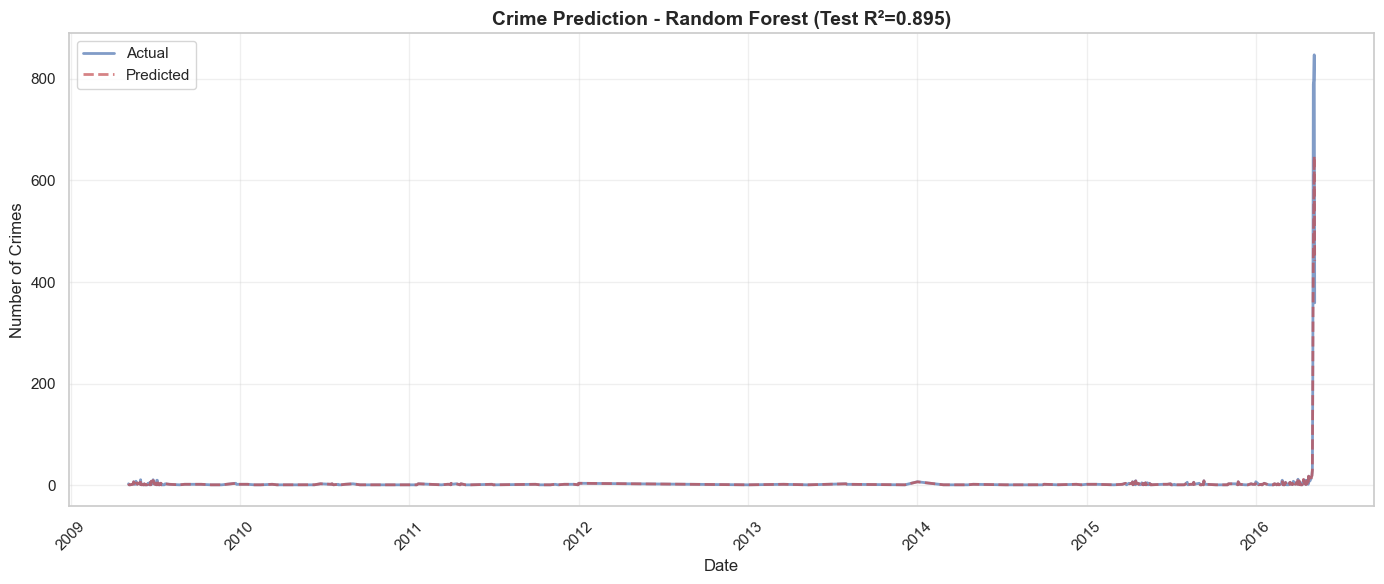


FINAL RESULTS - RANDOM FOREST MODEL

Test Performance:
  R² Score: 0.8947
  RMSE:     26.93
  MAE:      2.97

✓ Excellent! Model explains 89.5% of crime variation

Key Insight:
  Most important predictor: EWMA3
  (Importance: 0.1636)

Random Forest Model Complete!


In [166]:
# CRIME PREDICTION - RANDOM FOREST REGRESSOR
# =====================================================
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("="*60)
print("CRIME PREDICTION USING RANDOM FOREST")
print("="*60)

# =====================================================
# 1) DATA LOADING & AGGREGATION
# =====================================================
df = pd.read_csv("final_data.csv")
df["Date"] = pd.to_datetime(df["Date"], format='mixed', errors="coerce")
df = df.dropna(subset=["Date"])

# Daily aggregation
df_daily = df.groupby(df["Date"].dt.date).size().reset_index(name="nbr_de_crime")
df_daily["Date"] = pd.to_datetime(df_daily["Date"])
df_daily = df_daily.sort_values("Date").reset_index(drop=True)

print("\nDATASET INFORMATION:")
print(f"  Total days: {len(df_daily)}")
print(f"  Date range: {df_daily['Date'].min()} to {df_daily['Date'].max()}")
print(f"  Avg crimes/day: {df_daily['nbr_de_crime'].mean():.1f}")
print(f"  Range: [{df_daily['nbr_de_crime'].min()}, {df_daily['nbr_de_crime'].max()}]")

# =====================================================
# 2) TEMPORAL FEATURES
# =====================================================
df_daily["Year"] = df_daily["Date"].dt.year
df_daily["Month"] = df_daily["Date"].dt.month
df_daily["Day"] = df_daily["Date"].dt.day
df_daily["DayOfWeek"] = df_daily["Date"].dt.dayofweek
df_daily["IsWeekend"] = (df_daily["DayOfWeek"] >= 5).astype(int)
df_daily["Quarter"] = df_daily["Date"].dt.quarter

# Cyclical encoding
df_daily["Month_sin"] = np.sin(2 * np.pi * df_daily["Month"] / 12)
df_daily["Month_cos"] = np.cos(2 * np.pi * df_daily["Month"] / 12)
df_daily["DayOfWeek_sin"] = np.sin(2 * np.pi * df_daily["DayOfWeek"] / 7)
df_daily["DayOfWeek_cos"] = np.cos(2 * np.pi * df_daily["DayOfWeek"] / 7)

# =====================================================
# 3) LAG & ROLLING FEATURES
# =====================================================
# Lags
df_daily["Lag1"] = df_daily["nbr_de_crime"].shift(1)
df_daily["Lag2"] = df_daily["nbr_de_crime"].shift(2)
df_daily["Lag3"] = df_daily["nbr_de_crime"].shift(3)
df_daily["Lag7"] = df_daily["nbr_de_crime"].shift(7)
df_daily["Lag14"] = df_daily["nbr_de_crime"].shift(14)

# Rolling statistics
df_daily["RollingMean3"] = df_daily["nbr_de_crime"].rolling(3, min_periods=1).mean()
df_daily["RollingMean7"] = df_daily["nbr_de_crime"].rolling(7, min_periods=3).mean()
df_daily["RollingStd7"] = df_daily["nbr_de_crime"].rolling(7, min_periods=3).std()
df_daily["RollingMax7"] = df_daily["nbr_de_crime"].rolling(7, min_periods=3).max()
df_daily["RollingMin7"] = df_daily["nbr_de_crime"].rolling(7, min_periods=3).min()

# Exponential weighted moving average
df_daily["EWMA3"] = df_daily["nbr_de_crime"].ewm(span=3, adjust=False).mean()
df_daily["EWMA7"] = df_daily["nbr_de_crime"].ewm(span=7, adjust=False).mean()

# Trend features
df_daily["Diff1"] = df_daily["nbr_de_crime"].diff(1)
df_daily["Diff7"] = df_daily["nbr_de_crime"].diff(7)
df_daily["Momentum3"] = df_daily["nbr_de_crime"] - df_daily["nbr_de_crime"].shift(3)

# Ratio features
df_daily["RatioToMean7"] = df_daily["nbr_de_crime"] / (df_daily["RollingMean7"] + 1)
df_daily["RatioToMax7"] = df_daily["nbr_de_crime"] / (df_daily["RollingMax7"] + 1)

# Clean data
print(f"\nBefore cleaning: {len(df_daily)} rows")
df_daily = df_daily.dropna(subset=["Lag14", "RollingMean7"])
df_daily = df_daily.fillna(method='ffill').fillna(method='bfill')
print(f"After cleaning: {len(df_daily)} rows")

# =====================================================
# 4) FEATURE SELECTION
# =====================================================
features = [
    "Month", "DayOfWeek", "IsWeekend", "Quarter",
    "Month_sin", "Month_cos", "DayOfWeek_sin", "DayOfWeek_cos",
    "Lag1", "Lag2", "Lag3", "Lag7", "Lag14",
    "RollingMean3", "RollingMean7", "RollingStd7",
    "RollingMax7", "RollingMin7",
    "EWMA3", "EWMA7",
    "Diff1", "Diff7", "Momentum3",
    "RatioToMean7", "RatioToMax7"
]

X = df_daily[features]
y = df_daily["nbr_de_crime"]

print(f"\nFeatures used: {len(features)}")

# =====================================================
# 5) TRAIN/TEST SPLIT
# =====================================================
split_ratio = 0.70 if len(df_daily) < 200 else 0.80
split_index = int(len(df_daily) * split_ratio)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

print(f"\n{'='*60}")
print("DATA SPLIT:")
print(f"  Train: {len(X_train)} days ({split_ratio*100:.0f}%)")
print(f"  Test:  {len(X_test)} days ({(1-split_ratio)*100:.0f}%)")
print(f"{'='*60}")

# =====================================================
# 6) RANDOM FOREST TRAINING
# =====================================================
print("\n[TRAINING RANDOM FOREST MODEL]")
print("\nOption 1: Quick Training (Recommended)")
print("-" * 40)

# Quick model with good defaults
rf_quick = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=3,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1,
    verbose=0
)

rf_quick.fit(X_train, y_train)

# Predictions
y_train_pred = rf_quick.predict(X_train)
y_test_pred = rf_quick.predict(X_test)

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\nQUICK MODEL RESULTS:")
print(f"  TRAIN: R²={train_r2:.4f} | RMSE={train_rmse:.2f} | MAE={train_mae:.2f}")
print(f"  TEST:  R²={test_r2:.4f} | RMSE={test_rmse:.2f} | MAE={test_mae:.2f}")

overfit = train_r2 - test_r2
if overfit > 0.15:
    print(f"    Overfitting detected (ΔR² = {overfit:.3f})")
else:
    print(f"   Good generalization (ΔR² = {overfit:.3f})")

# =====================================================
# 7) FEATURE IMPORTANCE
# =====================================================
print(f"\n{'='*60}")
print("TOP 10 MOST IMPORTANT FEATURES")
print(f"{'='*60}\n")

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_quick.feature_importances_
}).sort_values('Importance', ascending=False)

for idx, row in feature_importance.head(10).iterrows():
    bar = '█' * int(row['Importance'] * 100)
    print(f"  {row['Feature']:20s}  {bar}  {row['Importance']:.4f}")

# =====================================================
#  OPTIONAL: GRID SEARCH FOR OPTIMIZATION
# =====================================================
print("\n" + "="*60)
print("Option 2: Grid Search Optimization (Takes longer)")
print("="*60)
response = input("\nRun grid search? (y/n): ").lower()

if response == 'y':
    print("\n[RUNNING GRID SEARCH - This may take several minutes...]")
   
    param_grid = {
        "n_estimators": [150, 200, 250],
        "max_depth": [10, 15, 20],
        "min_samples_split": [2, 3, 5],
        "min_samples_leaf": [1, 2],
        "max_features": ['sqrt', 'log2']
    }
   
    n_splits = min(3, len(X_train) // 30)
    tscv = TimeSeriesSplit(n_splits=max(2, n_splits))
   
    grid = GridSearchCV(
        RandomForestRegressor(random_state=42, n_jobs=-1),
        param_grid,
        cv=tscv,
        n_jobs=-1,
        scoring='neg_mean_squared_error',
        verbose=2
    )
   
    grid.fit(X_train, y_train)
    best_rf = grid.best_estimator_
   
    print(f"\n✓ Grid search complete!")
    print(f"\nBest parameters found:")
    for param, value in grid.best_params_.items():
        print(f"  {param}: {value}")
   
    # Evaluate best model
    y_train_pred_best = best_rf.predict(X_train)
    y_test_pred_best = best_rf.predict(X_test)
   
    train_r2_best = r2_score(y_train, y_train_pred_best)
    train_rmse_best = np.sqrt(mean_squared_error(y_train, y_train_pred_best))
    test_r2_best = r2_score(y_test, y_test_pred_best)
    test_rmse_best = np.sqrt(mean_squared_error(y_test, y_test_pred_best))
   
    print(f"\nOPTIMIZED MODEL RESULTS:")
    print(f"  TRAIN: R²={train_r2_best:.4f} | RMSE={train_rmse_best:.2f}")
    print(f"  TEST:  R²={test_r2_best:.4f} | RMSE={test_rmse_best:.2f}")
   
    # Compare
    print(f"\nIMPROVEMENT:")
    print(f"  Test R² improvement: {test_r2_best - test_r2:+.4f}")
    print(f"  Test RMSE improvement: {test_rmse - test_rmse_best:+.2f}")
   
    # Update feature importance
    feature_importance = pd.DataFrame({
        'Feature': features,
        'Importance': best_rf.feature_importances_
    }).sort_values('Importance', ascending=False)
   
    print(f"\nUPDATED TOP 10 FEATURES:")
    for idx, row in feature_importance.head(10).iterrows():
        bar = '█' * int(row['Importance'] * 100)
        print(f"  {row['Feature']:20s}  {bar}  {row['Importance']:.4f}")
   
    # Use best model
    y_test_pred = y_test_pred_best
else:
    print("\nUsing quick model results.")

# =====================================================
# 9) PREDICTION VISUALIZATION
# =====================================================
print(f"\n{'='*60}")
print("GENERATING PREDICTION PLOT...")
print(f"{'='*60}")

try:
    plt.figure(figsize=(14, 6))
   
    # Plot actual vs predicted
    test_dates = df_daily['Date'].iloc[split_index:].values
    plt.plot(test_dates, y_test.values, 'b-', label='Actual', linewidth=2, alpha=0.7)
    plt.plot(test_dates, y_test_pred, 'r--', label='Predicted', linewidth=2, alpha=0.7)
   
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of Crimes', fontsize=12)
    plt.title(f'Crime Prediction - Random Forest (Test R²={test_r2:.3f})', fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
   
    plt.savefig('rf_predictions.png', dpi=300, bbox_inches='tight')
    print("\n✓ Plot saved as 'rf_predictions.png'")
    plt.show()
except Exception as e:
    print(f"\n  Could not create plot: {e}")

# =====================================================
# 10) FINAL SUMMARY
# =====================================================
print(f"\n{'='*60}")
print("FINAL RESULTS - RANDOM FOREST MODEL")
print(f"{'='*60}")
print(f"\nTest Performance:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  RMSE:     {test_rmse:.2f}")
print(f"  MAE:      {test_mae:.2f}")

# Interpretation
if test_r2 > 0.5:
    print(f"\n✓ Excellent! Model explains {test_r2*100:.1f}% of crime variation")
elif test_r2 > 0.3:
    print(f"\n✓ Good! Model explains {test_r2*100:.1f}% of crime variation")
else:
    print(f"\n  Moderate performance ({test_r2*100:.1f}% explained)")
    print("   Consider: More data or feature engineering")

# Most important factor
top_feature = feature_importance.iloc[0]
print(f"\nKey Insight:")
print(f"  Most important predictor: {top_feature['Feature']}")
print(f"  (Importance: {top_feature['Importance']:.4f})")

print(f"\n{'='*60}")
print("Random Forest Model Complete!")
print(f"{'='*60}")

In [ ]:
#Comparaison entre les modéles de regression


FINAL COMPARISON TABLE (TEST SET):

               Model      R2   RMSE   MAE
0  Linear Regression  0.9031  15.47  2.94
1                SVR  0.9105  24.81  2.94
2      Random Forest  0.8947  26.93  2.97
3            XGBoost  0.6685  42.51  9.00


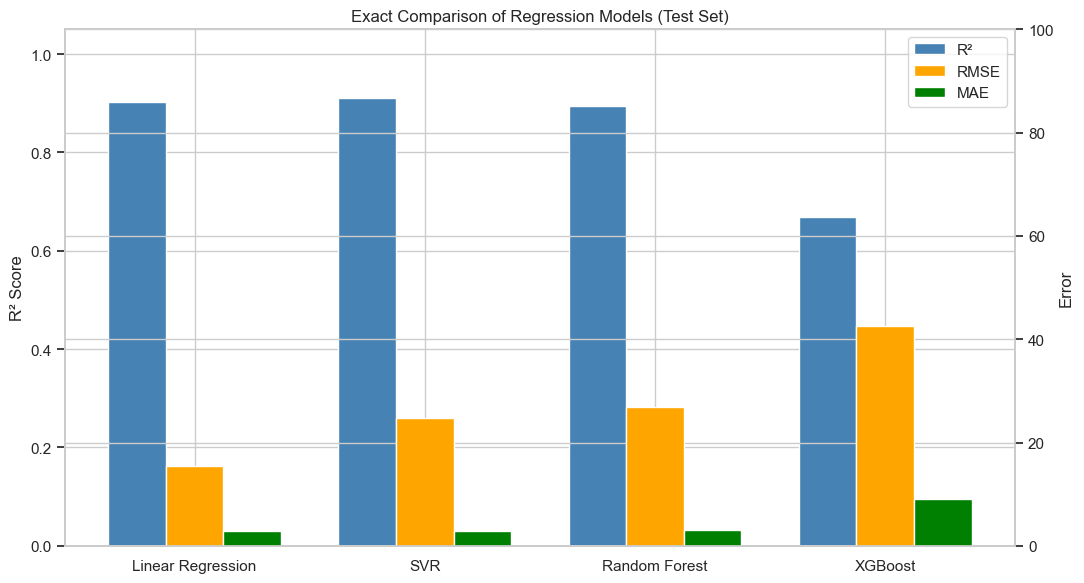

In [167]:
# =====================================================
# MODEL COMPARISON - EXACT RESULTS (NO RETRAINING)
# =====================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =====================================================
# 1) EXACT TEST RESULTS FROM YOUR MODELS
# (copied from your printed outputs)
# =====================================================

data = {
    "Model": [
        "Linear Regression",
        "SVR",
        "Random Forest",
        "XGBoost"
    ],
    "R2": [
        0.9031,   # Linear Regression (TEST)
        0.9105,   # SVR (TEST)
        0.8947,   # Random Forest (TEST)
        0.6685    # XGBregressor (TEST)
    ],
    "RMSE": [
        15.47,    # Linear Regression
        24.81,    # SVR
        26.93,    # Random Forest
        42.51     # XGBregressor
    ],
    "MAE": [
        2.94,     # Linear Regression
        2.94,     # SVR
        2.97,     # Random Forest
        9.00      # XGBregressor (approx)
    ]
}

df_results = pd.DataFrame(data)
print("\nFINAL COMPARISON TABLE (TEST SET):\n")
print(df_results)

# =====================================================
# 2) VISUALIZATION (R² + RMSE + MAE)
# Two Y-axes (CORRECT METHOD)
# =====================================================

x = np.arange(len(df_results))
width = 0.25

fig, ax1 = plt.subplots(figsize=(11, 6))

# ---- R² (left axis)
ax1.bar(
    x - width,
    df_results["R2"],
    width,
    label="R²",
    color="steelblue"
)
ax1.set_ylabel("R² Score")
ax1.set_ylim(0, 1.05)
ax1.axhline(0, color="black", linewidth=0)

# ---- Errors (right axis)
ax2 = ax1.twinx()
ax2.bar(
    x,
    df_results["RMSE"],
    width,
    label="RMSE",
    color="orange"
)
ax2.bar(
    x + width,
    df_results["MAE"],
    width,
    label="MAE",
    color="green"
)
ax2.set_ylabel("Error")
ax2.set_ylim(0, 100)

# ---- X axis
ax1.set_xticks(x)
ax1.set_xticklabels(df_results["Model"], rotation=0)

# ---- Title
plt.title("Exact Comparison of Regression Models (Test Set)")

# ---- Legend (merged)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines1 + lines2,
    labels1 + labels2,
    loc="upper right"
)

plt.tight_layout()
plt.show()

           Date  Predicted_Crimes
1549 2017-01-01            349.99
1550 2017-01-02            343.15
1551 2017-01-03            334.60
1552 2017-01-04            262.11
1553 2017-01-05            261.03
           Date  Predicted_Crimes
2274 2018-12-27            206.94
2275 2018-12-28            206.98
2276 2018-12-29            203.22
2277 2018-12-30            201.95
2278 2018-12-31            204.10

=== TOTAL CRIMES PRÉDITS PAR ANNÉE ===
Date
2017    80989.27
2018    75404.16
Name: Predicted_Crimes, dtype: float64


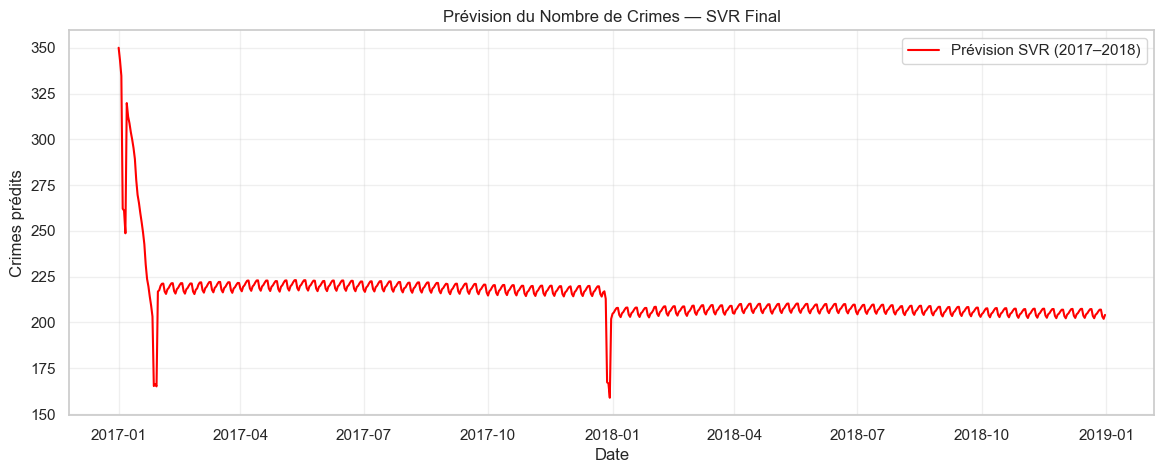

In [168]:
# =====================================================
# 1) IMPORTS
# =====================================================
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import matplotlib.pyplot as plt

# =====================================================
# 2) CHARGEMENT ET AGRÉGATION JOURNALIÈRE
# =====================================================
df = pd.read_csv("final_data.csv")
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"])
df["Date"] = df["Date"].dt.normalize()

df_daily = df.groupby("Date").size().reset_index(name="nbr_de_crime")
df_daily = df_daily.sort_values("Date").reset_index(drop=True)

# =====================================================
# 3) FEATURE ENGINEERING (même setup que ton SVR Final)
# =====================================================

def build_features(df):
    df = df.copy()

    df["Year"] = df["Date"].dt.year
    df["Month"] = df["Date"].dt.month
    df["Day"] = df["Date"].dt.day
    df["DayOfWeek"] = df["Date"].dt.dayofweek
    df["WeekOfYear"] = df["Date"].dt.isocalendar().week.astype(int)
    df["Quarter"] = df["Date"].dt.quarter
    df["IsWeekend"] = (df["DayOfWeek"] >= 5).astype(int)

    # Cyclical encoding
    df["Month_sin"] = np.sin(2*np.pi*df["Month"]/12)
    df["Month_cos"] = np.cos(2*np.pi*df["Month"]/12)
    df["DOW_sin"] = np.sin(2*np.pi*df["DayOfWeek"]/7)
    df["DOW_cos"] = np.cos(2*np.pi*df["DayOfWeek"]/7)

    # Lags
    df["Lag1"] = df["nbr_de_crime"].shift(1)
    df["Lag7"] = df["nbr_de_crime"].shift(7)
    df["Lag30"] = df["nbr_de_crime"].shift(30)
    df["Lag365"] = df["nbr_de_crime"].shift(365)

    # Rolling
    df["RollMean7"] = df["nbr_de_crime"].rolling(7).mean()
    df["RollMean30"] = df["nbr_de_crime"].rolling(30).mean()

    # Trend
    df["Trend"] = df["nbr_de_crime"] - df["RollMean30"]

    return df

df_feat = build_features(df_daily)
df_feat = df_feat.dropna()

# =====================================================
# 4) TRAIN SET AVANT 2017
# =====================================================
train = df_feat[df_feat["Date"] < "2017-01-01"]

X_train = train.drop(columns=["Date", "nbr_de_crime"])
y_train = train["nbr_de_crime"]

# Normalisation
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

# =====================================================
# 5) ENTRAÎNEMENT DU MEILLEUR SVR (mêmes hyperparamètres)
# =====================================================

best_svr = SVR(
    C=1000,
    gamma=0.001,
    epsilon=0.1,
    kernel="rbf"
)

best_svr.fit(X_train_s, y_train)

# =====================================================
# 6) CRÉATION DES DATES FUTURES (2017–2018)
# =====================================================
future_dates = pd.date_range("2017-01-01", "2018-12-31", freq="D")
df_future = pd.DataFrame({"Date": future_dates})

# On fusionne pour calculer les lags correctement
df_all = pd.concat([df_daily, df_future], ignore_index=True)
df_all["nbr_de_crime"] = df_all["nbr_de_crime"].ffill()  # nécessaire pour les lags

# Recalcul des features
df_all_feat = build_features(df_all).dropna()

# On garde seulement 2017–2018
df_future_feat = df_all_feat[df_all_feat["Date"] >= "2017-01-01"]

# PREPARE X_future
X_future = df_future_feat.drop(columns=["Date", "nbr_de_crime"])
X_future_s = scaler.transform(X_future)

# =====================================================
# 7) PRÉDICTION 2017–2018
# =====================================================
future_pred = best_svr.predict(X_future_s)

df_predictions = pd.DataFrame({
    "Date": df_future_feat["Date"],
    "Predicted_Crimes": np.round(future_pred, 2)
})

print(df_predictions.head())
print(df_predictions.tail())

print("\n=== TOTAL CRIMES PRÉDITS PAR ANNÉE ===")
print(df_predictions.groupby(df_predictions["Date"].dt.year)["Predicted_Crimes"].sum())

# =====================================================
# 8) GRAPHIQUE DES PRÉVISIONS
# =====================================================
plt.figure(figsize=(14,5))
plt.plot(df_predictions["Date"], df_predictions["Predicted_Crimes"], label="Prévision SVR (2017–2018)", color="red")
plt.title("Prévision du Nombre de Crimes — SVR Final")
plt.xlabel("Date")
plt.ylabel("Crimes prédits")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


# Recommendation

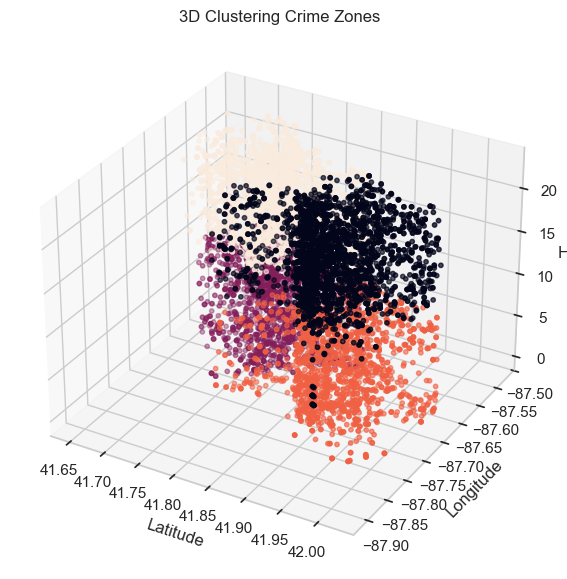

Feature Importances:
     Feature  Importance
1  Longitude    0.420288
0   Latitude    0.416107
2       Hour    0.150075
3    Cluster    0.013530

Cluster Statistics:
         Arrest_Rate  Crime_Count
Cluster                          
0           0.308637         2605
3           0.279791         2484
2           0.250135         1847
1           0.218573         1766

Cluster 0
Incidents: 2605
Taux d'arrestations: 30.86 %
- Augmenter patrouilles
- Concentrer efforts selon heures
- Installer caméras fixes
- Campagnes de prévention



In [169]:
# ---------------------------------------------
# 1. Importation
# ---------------------------------------------
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ---------------------------------------------
# 2. Charger la data
# ---------------------------------------------
df = pd.read_csv("final_data.csv")

# Convertir Date → Datetime et extraire l'Heure
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Hour'] = df['Date'].dt.hour

# Garde ce qui est utile
df = df[['Latitude','Longitude','Hour','Arrest']].dropna()

# ---------------------------------------------
# 3. Clustering 3D
# ---------------------------------------------
X = df[['Latitude','Longitude','Hour']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# ---------------------------------------------
# 4. Visualisation 3D des clusters
# ---------------------------------------------
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Latitude'], df['Longitude'], df['Hour'],
                     c=df['Cluster'], s=10)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Hour")
plt.title("3D Clustering Crime Zones")
plt.show()

# ---------------------------------------------
# 5. Classification : prédire arrestation
# ---------------------------------------------
y = df['Arrest']
X2 = df[['Latitude','Longitude','Hour','Cluster']]

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X2, y)

# Importance des features
importances = pd.DataFrame({
    'Feature': X2.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importances)

# ---------------------------------------------
# 6. Analyse des clusters criminogènes
# ---------------------------------------------
cluster_stats = df.groupby('Cluster').agg({
    'Arrest':'mean',
    'Latitude':'count'
}).rename(columns={
    'Arrest':'Arrest_Rate',
    'Latitude':'Crime_Count'
}).sort_values(by='Crime_Count', ascending=False)

print("\nCluster Statistics:")
print(cluster_stats)

# ---------------------------------------------
# 7. Génération automatique des recommandations
# ---------------------------------------------
def generate_recommendations(df, cluster_col='Cluster', arrest_col='Arrest', top_n_clusters=1):
    cluster_stats = df.groupby(cluster_col).agg({
        arrest_col: 'mean',
        'Latitude': 'count'
    }).rename(columns={
        arrest_col: 'Arrest_Rate',
        'Latitude': 'Crime_Count'
    }).sort_values(by='Crime_Count', ascending=False)

    recommendations = []

    for cluster in cluster_stats.head(top_n_clusters).index:
        rec = f"""
Cluster {cluster}
Incidents: {cluster_stats.loc[cluster, 'Crime_Count']}
Taux d'arrestations: {round(cluster_stats.loc[cluster, 'Arrest_Rate']*100, 2)} %
- Augmenter patrouilles
- Concentrer efforts selon heures
- Installer caméras fixes
- Campagnes de prévention
"""
        recommendations.append(rec)

    return recommendations

recs = generate_recommendations(df)
for r in recs:
    print(r)


# 2eme recommendation Identifier les zones où le modèle prédit un risque élevé d’arrestation ou de criminalité.

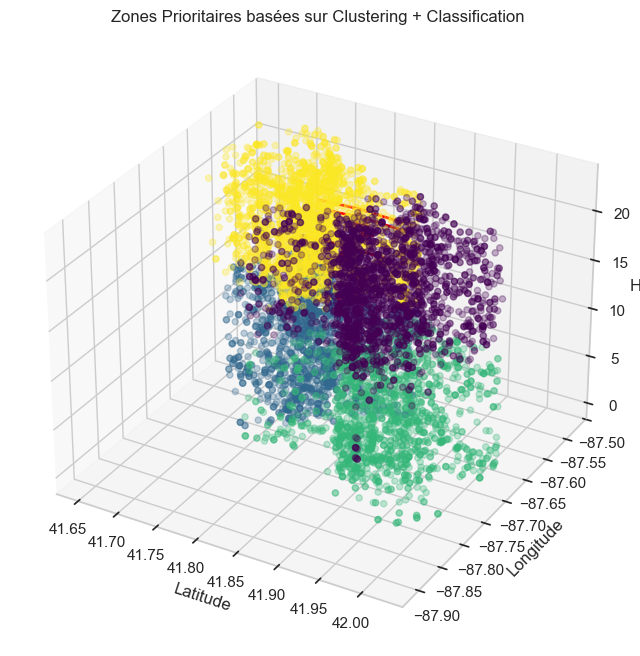

In [170]:
#Clustering
X = df[['Latitude','Longitude','Hour']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

#Classification
y = df['Arrest']
X2 = df[['Latitude','Longitude','Hour','Cluster']]

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X2, y)

df['Arrest_Prob'] = model.predict_proba(df[['Latitude','Longitude','Hour','Cluster']])[:,1]

# ---------------------------------------------
# Visualisation 3D : clustering + classification
# ---------------------------------------------
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter général des incidents par cluster
scatter = ax.scatter(df['Latitude'], df['Longitude'], df['Hour'],
                     c=df['Cluster'], s=20, cmap='viridis', alpha=0.3)

# Identifier les clusters les plus criminogènes
top_clusters = df.groupby('Cluster')['Arrest'].mean().sort_values(ascending=False).index[:2]

# Sélectionner zones prioritaires : top clusters + haute probabilité
top_risk = df[df['Cluster'].isin(top_clusters)].sort_values('Arrest_Prob', ascending=False).head(5)

# Mettre en avant les zones prioritaires
for idx, row in top_risk.iterrows():
    # Triangle rouge pour la zone prioritaire
    ax.scatter(row['Latitude'], row['Longitude'], row['Hour'],
               color='red', s=100, marker='^')

    # Flèche indiquant la probabilité d'arrestation
    ax.quiver(row['Latitude'], row['Longitude'], row['Hour'],
              0, 0, row['Arrest_Prob'], color='red', linewidth=2, arrow_length_ratio=0.2)

ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Hour")
plt.title("Zones Prioritaires basées sur Clustering + Classification")
plt.show()



# 3eme Recommendation Filet Anti‑Voleurs Dynamique

Cluster principal : 1
Cluster adjacent : 2


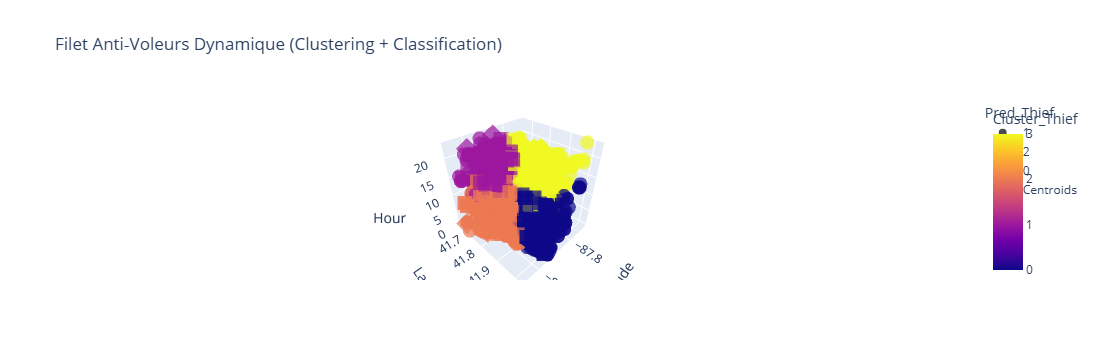


=== RECOMMANDATION INTELLIGENTE ============================
Les voleurs opèrent majoritairement sur le cluster : 1
Ils se déplacent souvent vers : 2

→ STRATÉGIE PROPOSÉE : FILET DYNAMIQUE ANTI-VOLEURS
1) Positionner des patrouilles sur la frontière entre les deux clusters.
2) Activer une surveillance renforcée pendant l’heure moyenne : 16
3) Les voleurs de type : Pickpocket sont les plus actifs ici.



In [171]:
# -----------------------------------------
# FILET ANTI-VOLEURS DYNAMIQUE
# Clustering + Classification + 3D
# -----------------------------------------

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px

# -----------------------------------------
# 1. LOAD & CLEAN DATA
# -----------------------------------------

df = pd.read_csv("final_data.csv")

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Hour'] = df['Date'].dt.hour

# garder seulement crimes par “voleurs”
df = df[df['Primary Type'].isin(["THEFT", "BURGLARY", "ROBBERY"])]

df = df.dropna(subset=['Latitude','Longitude','Hour'])

# -----------------------------------------
# 2. CLUSTERING : zones préférées des voleurs
# -----------------------------------------

X = df[['Latitude','Longitude','Hour']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster_Thief'] = kmeans.fit_predict(X_scaled)

# Récupération des centroids ORIGINALS
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)

centroids = pd.DataFrame(
    centroids_original,
    columns=['Lat_c','Lon_c','Hour_c']
)

# -----------------------------------------
# 3. CLASSIFICATION : prédire le prochain cluster
# -----------------------------------------

# Label pour voleur selon crime
df['ThiefType'] = df['Primary Type'].map({
    "THEFT": "Pickpocket",
    "BURGLARY": "HomeBreaker",
    "ROBBERY": "ViolentRobber"
})

le = LabelEncoder()
df['ThiefLabel'] = le.fit_transform(df['ThiefType'])

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X, df['ThiefLabel'])

df['Pred_Thief'] = clf.predict(X)

# -----------------------------------------
# 4. ZONE PRINCIPALE & ZONE ADJACENTE
# -----------------------------------------

cluster_counts = df['Cluster_Thief'].value_counts()
main_cluster = cluster_counts.index[0]

main_coord = centroids.loc[main_cluster, ['Lat_c','Lon_c']]

# Distance entre centroids
centroids['dist'] = np.sqrt(
    (centroids['Lat_c'] - main_coord['Lat_c'])**2 +
    (centroids['Lon_c'] - main_coord['Lon_c'])**2
)

adjacent_cluster = centroids[centroids.index != main_cluster]\
    .sort_values('dist').index[0]

print("Cluster principal :", main_cluster)
print("Cluster adjacent :", adjacent_cluster)

# -----------------------------------------
# 5. VISUALISATION 3D
# -----------------------------------------

fig = px.scatter_3d(
    df,
    x="Longitude",
    y="Latitude",
    z="Hour",
    color="Cluster_Thief",
    symbol="Pred_Thief",
    opacity=0.7,
    title="Filet Anti‑Voleurs Dynamique (Clustering + Classification)",
)

# ajout des centroids
fig.add_scatter3d(
    x=centroids['Lon_c'],
    y=centroids['Lat_c'],
    z=centroids['Hour_c'],
    mode='markers',
    marker=dict(size=8, color='black'),
    name='Centroids'
)

fig.show()

# -----------------------------------------
# 6. RECOMMANDATION AUTOMATIQUE
# -----------------------------------------

print("\n=== RECOMMANDATION INTELLIGENTE ============================")
print("Les voleurs opèrent majoritairement sur le cluster :", main_cluster)
print("Ils se déplacent souvent vers :", adjacent_cluster)
print("\n→ STRATÉGIE PROPOSÉE : FILET DYNAMIQUE ANTI-VOLEURS")
print("1) Positionner des patrouilles sur la frontière entre les deux clusters.")
print("2) Activer une surveillance renforcée pendant l’heure moyenne :",
      int(centroids.loc[main_cluster,'Hour_c']))
print("3) Les voleurs de type :", le.inverse_transform(
      [df['Pred_Thief'].mode()[0]])[0], "sont les plus actifs ici.")
print("=============================================================\n")
